In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(84)


df = pd.read_csv('led.csv')

# **Data Preprocessing**


## Handling missing values

In [11]:
# Removing Irrelevant Columns
df['percentageexpenditure'] = df['Totalexpenditure']
df = df.drop(['Population', 'AdultMortality', 'Totalexpenditure', 'thinness1-19years', 'thinness5-9years', 'under-fivedeaths', 'Year', 'HIV/AIDS', 'Measles', 'infantdeaths', 'BMI', 'Alcohol'], axis=1)

In [12]:
# handling missing values
# imputation of the mean for columns with very little data missing
lifeexpectancy_median = df['Lifeexpectancy'].median()
df['Lifeexpectancy'] = df["Lifeexpectancy"].fillna(lifeexpectancy_median)

HepatitisB_median = df['HepatitisB'].median()
df['HepatitisB'] = df['HepatitisB'].fillna(HepatitisB_median)
Diptheria_median = df['Diphtheria'].median()
df['Diphtheria'] = df["Diphtheria"].fillna(Diptheria_median)

Polio_median = df['Polio'].median()
df['Polio'] = df["Polio"].fillna(Polio_median)

Incomecompositionofresources_median = df['Incomecompositionofresources'].median()
df['Incomecompositionofresources'] = df["Incomecompositionofresources"].fillna(Incomecompositionofresources_median)

Schooling_median = df['Schooling'].median()
df['Schooling'] = df["Schooling"].fillna(Schooling_median)

percexp_median = df['percentageexpenditure'].median()
df['percentageexpenditure'] = df["percentageexpenditure"].fillna(percexp_median)



In [13]:
df.dropna(subset=['GDP'], inplace=True)
df.reset_index(drop=True, inplace=True)


## One-hot-encoding

In [14]:
# handling categorical data
status_encoded = pd.get_dummies(df['Status'])
df = pd.concat([df, status_encoded], axis=1)
df = df.drop(['Status'], axis=1)

In [15]:
# add continent classification
country_to_continent = pd.read_csv('Countries_by_continents.csv')
df.reset_index(drop=True, inplace=True)
df_copy = pd.merge(df, country_to_continent, on='Country', how='outer')
Continent = df_copy['Continent']
df.insert(1, 'Continent', Continent)
continent_encoded = pd.get_dummies(df['Continent'])
df = pd.concat([df, continent_encoded], axis=1)
df = df.drop(['Continent'], axis=1)

## Handling Outliers

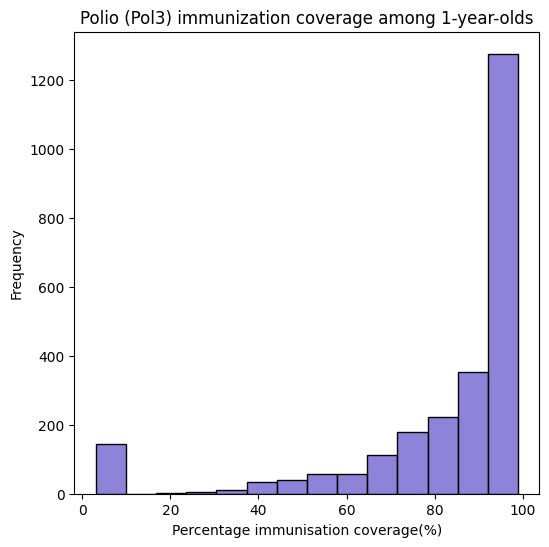

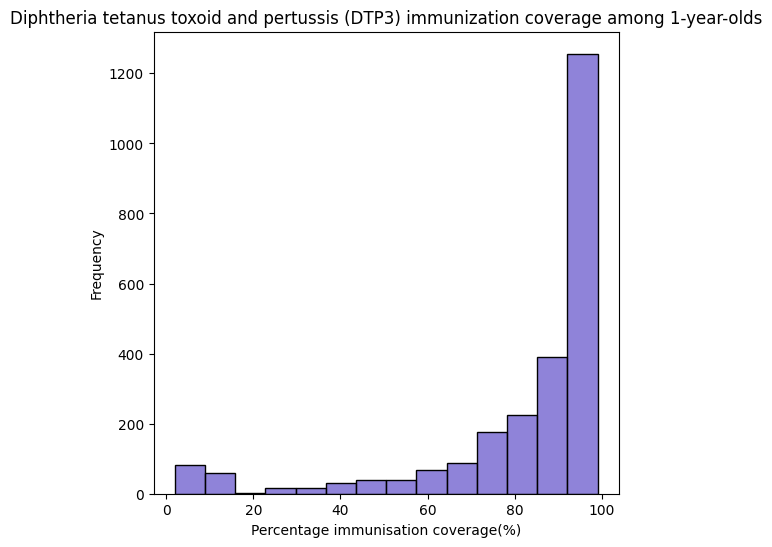

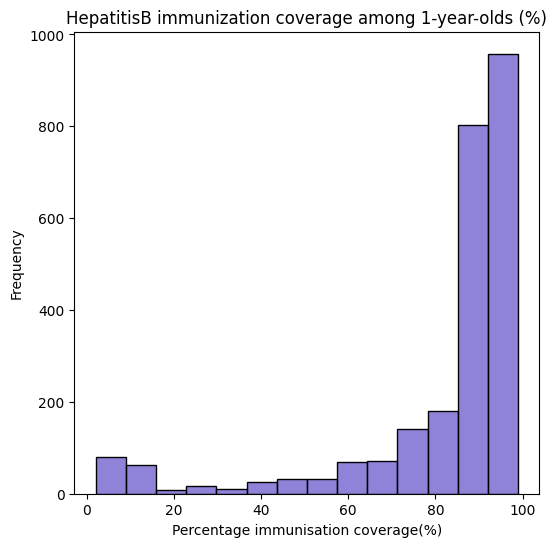

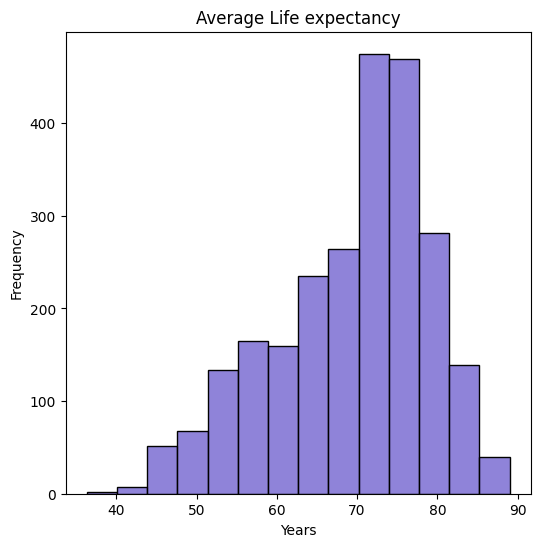

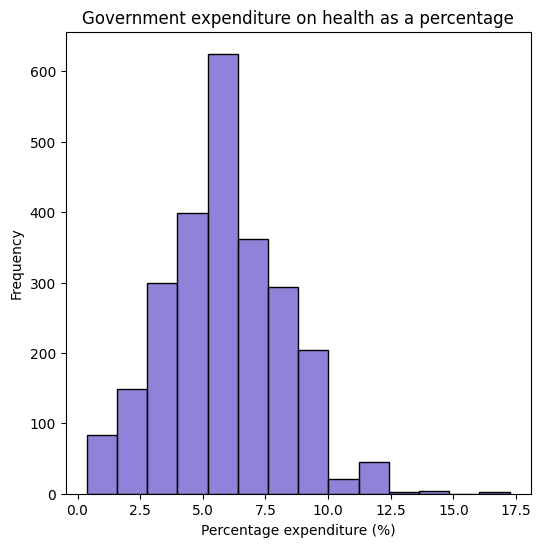

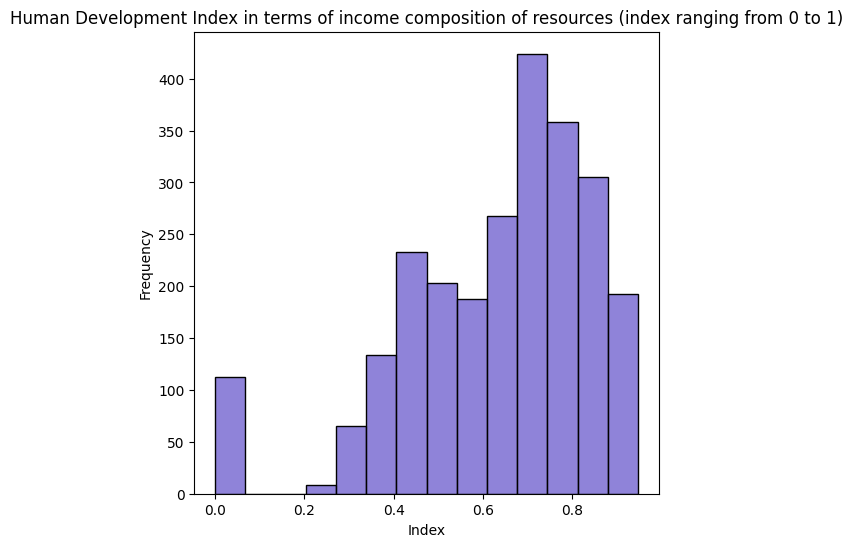

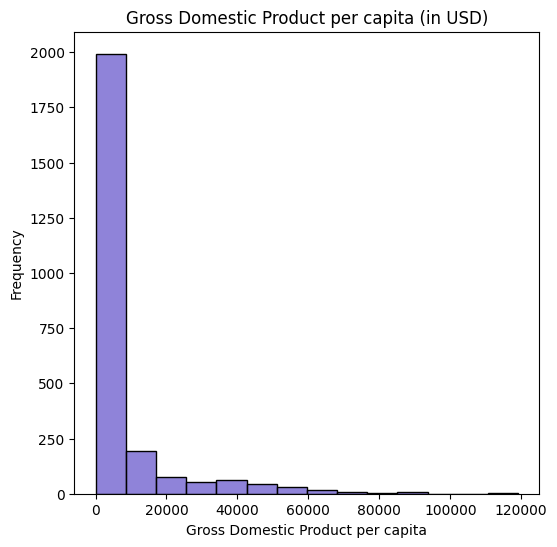

Text(0, 0.5, 'Frequency')

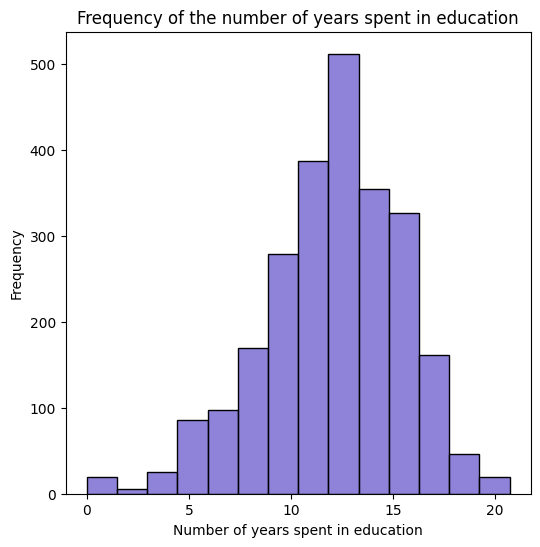

In [16]:
# Displaying Outliers
import seaborn as sns

data = df['Polio']
bin_edges = np.linspace(min(data), max(data), 15)
plt.figure(figsize=(6, 6))
sns.histplot(data, bins=bin_edges, color='slateblue')
plt.title('Polio (Pol3) immunization coverage among 1-year-olds')
plt.xlabel('Percentage immunisation coverage(%)')
plt.ylabel('Frequency')
plt.show()

data = df['Diphtheria']
bin_edges = np.linspace(min(data), max(data), 15)
plt.figure(figsize=(6, 6))
sns.histplot(data, bins=bin_edges, color='slateblue')
plt.title('Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds')
plt.xlabel('Percentage immunisation coverage(%)')
plt.ylabel('Frequency')
plt.show()

data = df['HepatitisB']
bin_edges = np.linspace(min(data), max(data), 15)
plt.figure(figsize=(6, 6))
sns.histplot(data, bins=bin_edges, color='slateblue')
plt.title('HepatitisB immunization coverage among 1-year-olds (%)')
plt.xlabel('Percentage immunisation coverage(%)')
plt.ylabel('Frequency')
plt.show()



data = df['Lifeexpectancy']
bin_edges = np.linspace(min(data), max(data), 15)
plt.figure(figsize=(6, 6))
sns.histplot(data, bins=bin_edges, color='slateblue')
plt.title('Average Life expectancy')
plt.xlabel('Years')
plt.ylabel('Frequency')
plt.show()

data = df['percentageexpenditure']
bin_edges = np.linspace(min(data), max(data), 15)
plt.figure(figsize=(6, 6))
sns.histplot(data, bins=bin_edges, color='slateblue')
plt.title('Government expenditure on health as a percentage')
plt.xlabel('Percentage expenditure (%)')
plt.ylabel('Frequency')
plt.show()


data = df['Incomecompositionofresources']
bin_edges = np.linspace(min(data), max(data), 15)
plt.figure(figsize=(6, 6))
sns.histplot(data, bins=bin_edges, color='slateblue')
plt.title('Human Development Index in terms of income composition of resources (index ranging from 0 to 1)')
plt.xlabel('Index')
plt.ylabel('Frequency')
plt.show()

data = df['GDP']
bin_edges = np.linspace(min(data), max(data), 15)
plt.figure(figsize=(6, 6))
sns.histplot(data, bins=bin_edges, color='slateblue')
plt.title('Gross Domestic Product per capita (in USD)')
plt.xlabel('Gross Domestic Product per capita')
plt.ylabel('Frequency')
plt.show()

data = df['Schooling']
bin_edges = np.linspace(min(data), max(data), 15)
plt.figure(figsize=(6, 6))
sns.histplot(data, bins=bin_edges, color='slateblue')
plt.title('Frequency of the number of years spent in education')
plt.xlabel('Number of years spent in education')
plt.ylabel('Frequency')



In [17]:
# Handling Outliers
# Manual Winsorisation

#Polio
lower_lim = 30
upper_lim = 98
df.loc[df['Polio'] < lower_lim, 'Polio'] = lower_lim
df.loc[df['Polio'] > upper_lim, 'Polio'] = upper_lim

#Diphtheria
lower_lim = 30
upper_lim = 98
df.loc[df['Diphtheria'] < lower_lim, 'Diphtheria'] = lower_lim
df.loc[df['Diphtheria'] > upper_lim, 'Diphtheria'] = upper_lim

#HepatitisB
lower_lim = 30
upper_lim = 98
df.loc[df['HepatitisB'] < lower_lim, 'HepatitisB'] = lower_lim
df.loc[df['HepatitisB'] > upper_lim, 'HepatitisB'] = upper_lim

#Life expectancy
lower_lim = 50
upper_lim = 90
df.loc[df['Lifeexpectancy'] < lower_lim, 'Lifeexpectancy'] = lower_lim
df.loc[df['Lifeexpectancy'] > upper_lim, 'Lifeexpectancy'] = upper_lim

#Percentage expenditure
lower_lim = 3
upper_lim = 12.5
df.loc[df['percentageexpenditure'] < lower_lim, 'percentageexpenditure'] = lower_lim
df.loc[df['percentageexpenditure'] > upper_lim, 'percentageexpenditure'] = upper_lim

#GDP
lower_lim = 0
upper_lim = 100000
df.loc[df['GDP'] < lower_lim, 'GDP'] = lower_lim
df.loc[df['GDP'] > upper_lim, 'GDP'] = upper_lim

#Income composition of resources
lower_lim = 0.2
upper_lim = 1
df.loc[df['Incomecompositionofresources'] < lower_lim, 'Incomecompositionofresources'] = lower_lim
df.loc[df['Incomecompositionofresources'] > upper_lim, 'Incomecompositionofresources'] = upper_lim

#Schooling
lower_lim = 5
upper_lim = 20
df.loc[df['Schooling'] < lower_lim, 'Schooling'] = lower_lim
df.loc[df['Schooling'] > upper_lim, 'Schooling'] = upper_lim



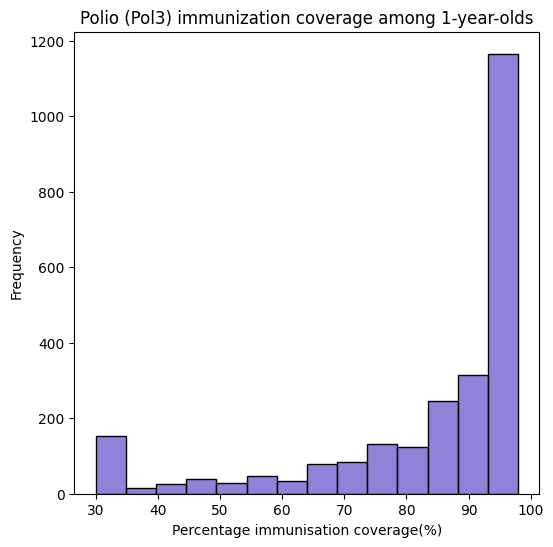

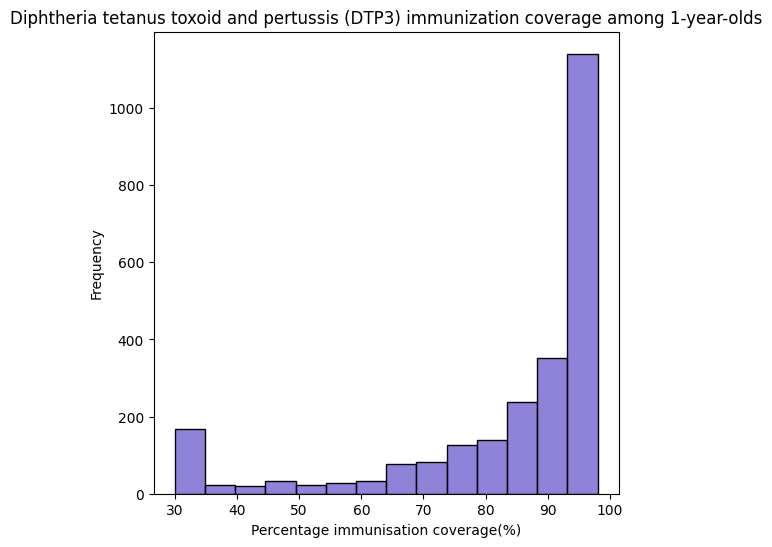

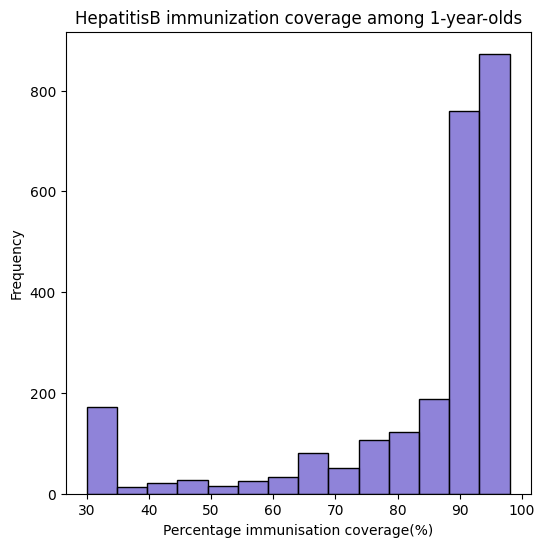

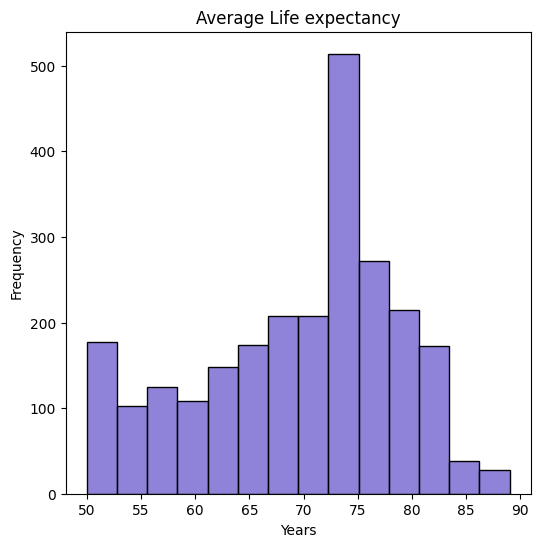

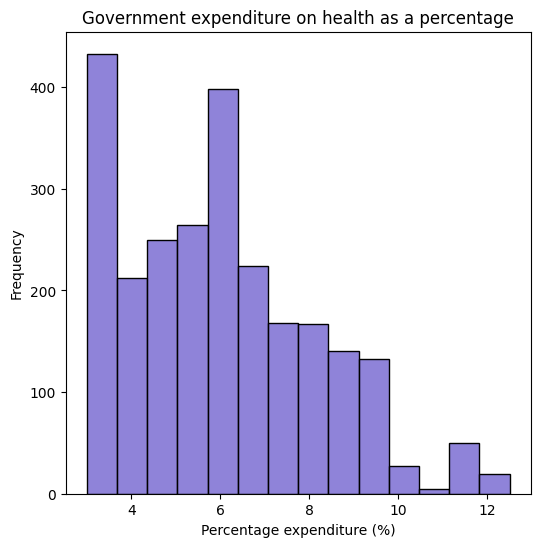

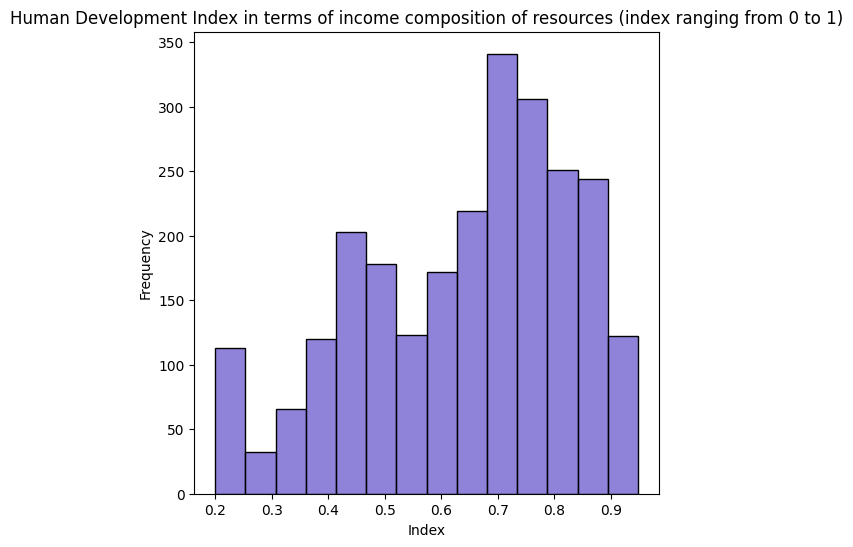

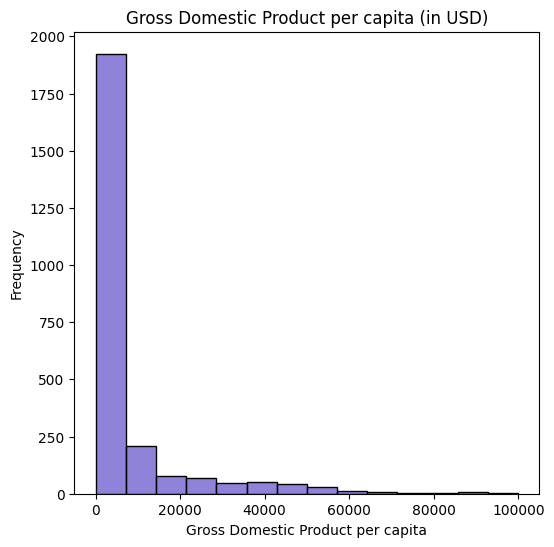

Text(0, 0.5, 'Frequency')

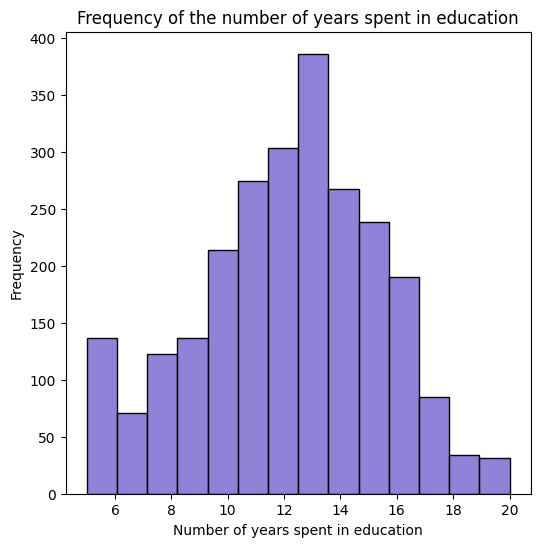

In [18]:
# Post Outlier Handling
data = df['Polio']
bin_edges = np.linspace(min(data), max(data), 15)
plt.figure(figsize=(6, 6))
sns.histplot(data, bins=bin_edges, color='slateblue')
plt.title('Polio (Pol3) immunization coverage among 1-year-olds')
plt.xlabel('Percentage immunisation coverage(%)')
plt.ylabel('Frequency')
plt.show()

data = df['Diphtheria']
bin_edges = np.linspace(min(data), max(data), 15)
plt.figure(figsize=(6, 6))
sns.histplot(data, bins=bin_edges, color='slateblue')
plt.title('Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds')
plt.xlabel('Percentage immunisation coverage(%)')
plt.ylabel('Frequency')
plt.show()

data = df['HepatitisB']
bin_edges = np.linspace(min(data), max(data), 15)
plt.figure(figsize=(6, 6))
sns.histplot(data, bins=bin_edges, color='slateblue')
plt.title('HepatitisB immunization coverage among 1-year-olds')
plt.xlabel('Percentage immunisation coverage(%)')
plt.ylabel('Frequency')
plt.show()



data = df['Lifeexpectancy']
bin_edges = np.linspace(min(data), max(data), 15)
plt.figure(figsize=(6, 6))
sns.histplot(data, bins=bin_edges, color='slateblue')
plt.title('Average Life expectancy')
plt.xlabel('Years')
plt.ylabel('Frequency')
plt.show()

data = df['percentageexpenditure']
bin_edges = np.linspace(min(data), max(data), 15)
plt.figure(figsize=(6, 6))
sns.histplot(data, bins=bin_edges, color='slateblue')
plt.title('Government expenditure on health as a percentage')
plt.xlabel('Percentage expenditure (%)')
plt.ylabel('Frequency')
plt.show()


data = df['Incomecompositionofresources']
bin_edges = np.linspace(min(data), max(data), 15)
plt.figure(figsize=(6, 6))
sns.histplot(data, bins=bin_edges, color='slateblue')
plt.title('Human Development Index in terms of income composition of resources (index ranging from 0 to 1)')
plt.xlabel('Index')
plt.ylabel('Frequency')
plt.show()

data = df['GDP']
bin_edges = np.linspace(min(data), max(data), 15)
plt.figure(figsize=(6, 6))
sns.histplot(data, bins=bin_edges, color='slateblue')
plt.title('Gross Domestic Product per capita (in USD)')
plt.xlabel('Gross Domestic Product per capita')
plt.ylabel('Frequency')
plt.show()

data = df['Schooling']
bin_edges = np.linspace(min(data), max(data), 15)
plt.figure(figsize=(6, 6))
sns.histplot(data, bins=bin_edges, color='slateblue')
plt.title('Frequency of the number of years spent in education')
plt.xlabel('Number of years spent in education')
plt.ylabel('Frequency')





# **Visualisation**

## Bar Charts

(array([0, 1]), [Text(0, 0, 'Developed'), Text(1, 0, 'Developing')])

<Figure size 1000x600 with 0 Axes>

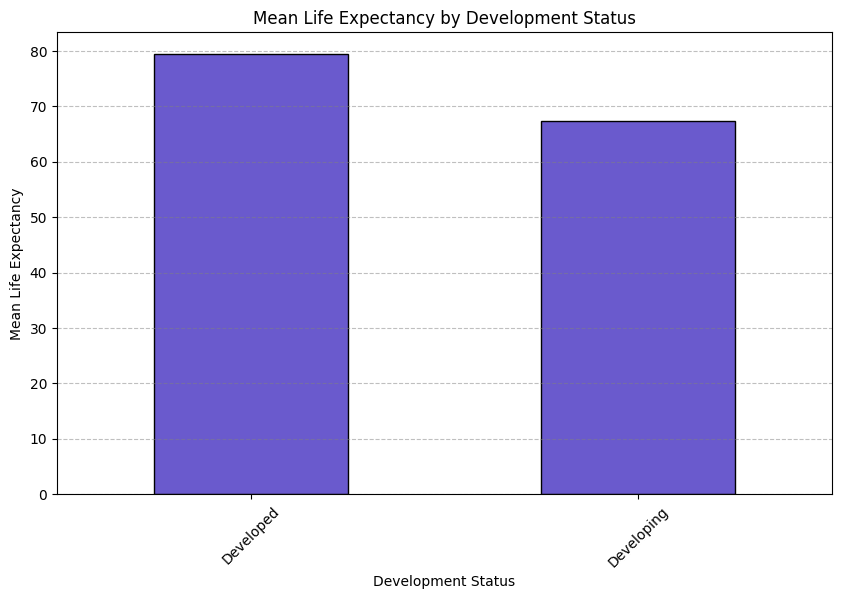

In [19]:
plt.figure(figsize=(10,6))
mean_developed_expectancy = df[df['Developed'] == 1]['Lifeexpectancy'].mean()
mean_developing_expectancy = df[df['Developing'] ==1]['Lifeexpectancy'].mean()
mean_expectancies = {'Developed': mean_developed_expectancy,
                     'Developing' : mean_developing_expectancy}
mean_expectancies = pd.Series(mean_expectancies)
fig, ax = plt.subplots(figsize=(10, 6))
mean_expectancies.plot(kind='bar', color='slateblue', edgecolor="black", ax=ax)
ax.yaxis.grid(True, linestyle='--', color='gray', alpha=0.5)
plt.title('Mean Life Expectancy by Development Status')
plt.xlabel('Development Status')
plt.ylabel('Mean Life Expectancy')
plt.xticks(rotation = 45)


<Figure size 1000x600 with 0 Axes>

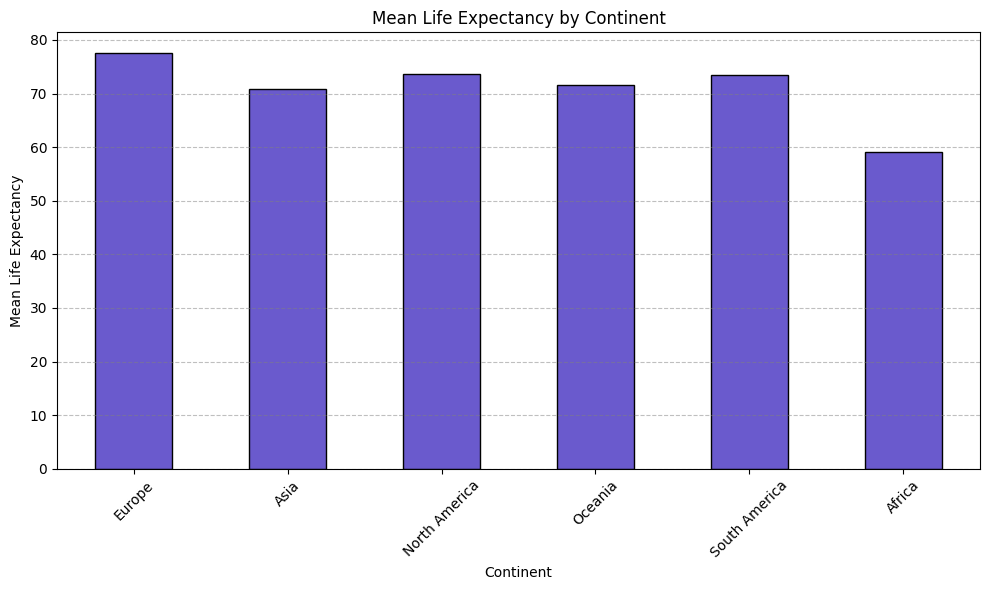

In [20]:
continent_means = {}

for continent in ['Europe', 'Asia', 'North America', 'Oceania', 'South America', 'Africa']:
    continent_df = df[df[continent] == 1]
    mean_life_expectancy = continent_df['Lifeexpectancy'].mean()

    continent_means[continent] = mean_life_expectancy

continent_means_series = pd.Series(continent_means)

# Plot the bar chart
plt.figure(figsize=(10, 6))
fig, ax = plt.subplots(figsize=(10, 6))
continent_means_series.plot(kind='bar', color='slateblue', edgecolor="black", ax=ax)
ax.yaxis.grid(True, linestyle='--', color='gray', alpha=0.5)
plt.title('Mean Life Expectancy by Continent')
plt.xlabel('Continent')
plt.ylabel('Mean Life Expectancy')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Scatter Plots

<function matplotlib.pyplot.show(close=None, block=None)>

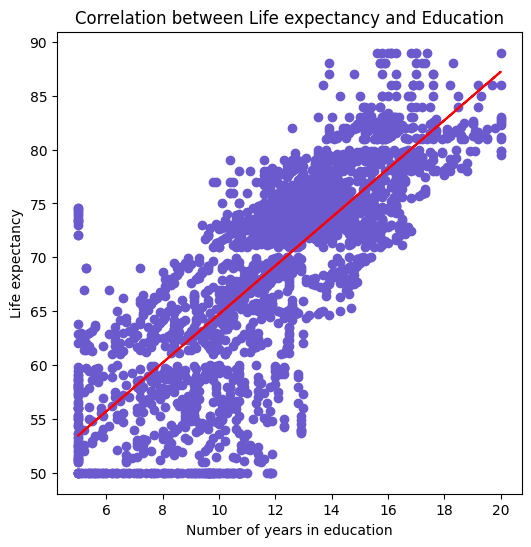

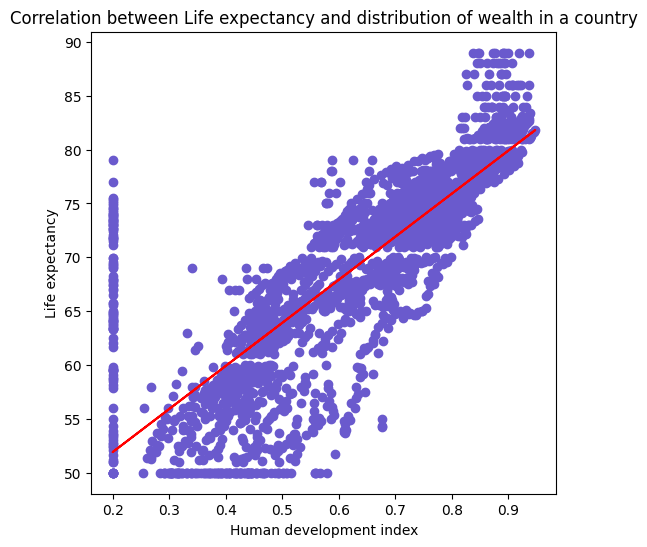

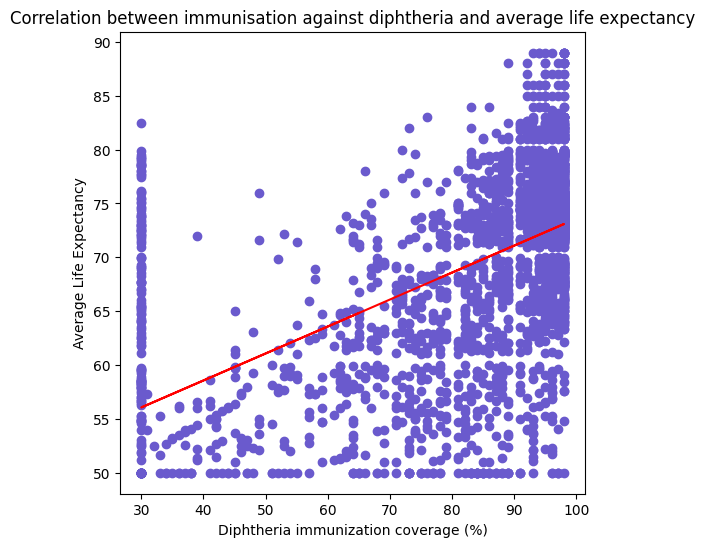

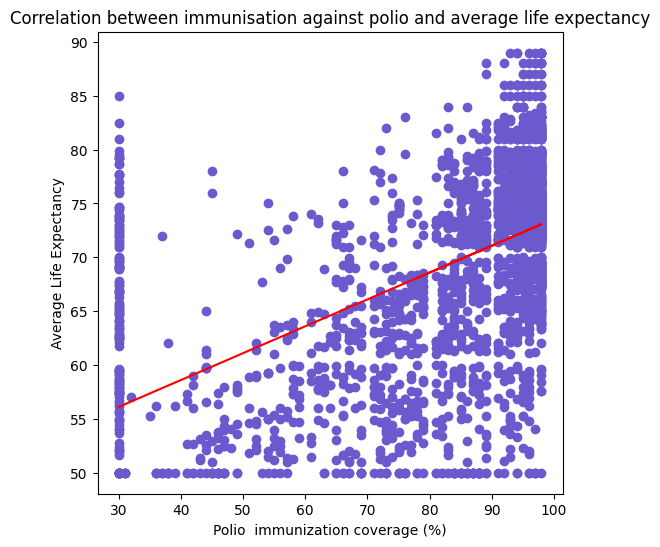

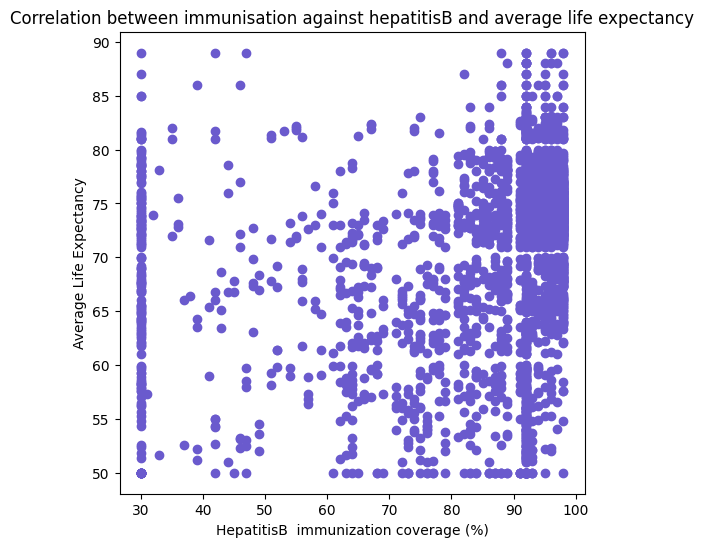

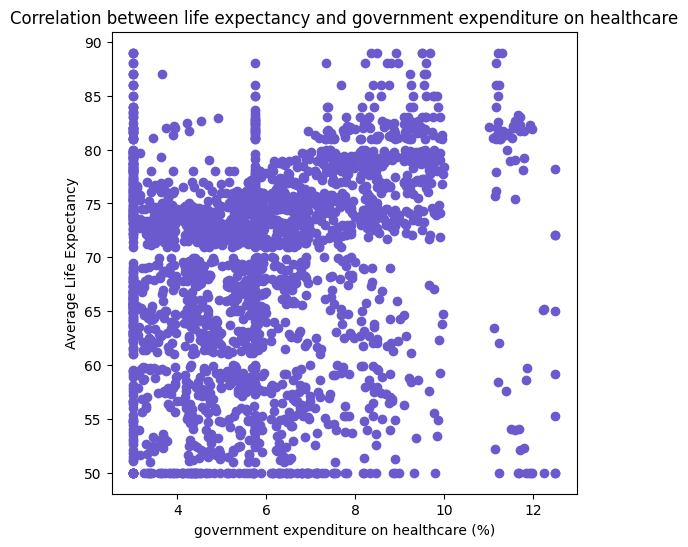

In [21]:
#Feature and life expectancy correlation
x = df['Schooling']
y = df['Lifeexpectancy']

plt.figure(figsize=(6,6))
slope, intercept = np.polyfit(x, y, 1)
x_values = np.array(x)
y_values = slope * x_values + intercept
plt.plot(x_values, y_values, color='red')
plt.xlabel('Number of years in education')
plt.ylabel('Life expectancy')
plt.title('Correlation between Life expectancy and Education')
plt.scatter(x, y, color='slateblue')
plt.show

x = df['Incomecompositionofresources']
y = df['Lifeexpectancy']

plt.figure(figsize=(6,6))
slope, intercept = np.polyfit(x, y, 1)
x_values = np.array(x)
y_values = slope * x_values + intercept
plt.plot(x_values, y_values, color='red')
plt.xlabel('Human development index')
plt.ylabel('Life expectancy')
plt.title('Correlation between Life expectancy and distribution of wealth in a country')
plt.scatter(x, y, color='slateblue')
plt.show

x= df['Diphtheria']
y = df['Lifeexpectancy']
plt.figure(figsize=(6,6))
slope, intercept = np.polyfit(x, y, 1)
x_values = np.array(x)
y_values = slope * x_values + intercept
plt.plot(x_values, y_values, color='red')
plt.xlabel('Diphtheria immunization coverage (%)')
plt.ylabel('Average Life Expectancy')
plt.title('Correlation between immunisation against diphtheria and average life expectancy')
plt.scatter(x, y, color='slateblue')
plt.show

x = df['Polio']
y = df['Lifeexpectancy']
plt.figure(figsize=(6,6))
slope, intercept = np.polyfit(x, y, 1)
x_values = np.array(x)
y_values = slope * x_values + intercept
plt.plot(x_values, y_values, color='red')
plt.xlabel('Polio  immunization coverage (%)')
plt.ylabel('Average Life Expectancy')
plt.title('Correlation between immunisation against polio and average life expectancy')
plt.scatter(x, y, color='slateblue')
plt.show

x = df['HepatitisB']
y = df['Lifeexpectancy']
plt.figure(figsize=(6,6))
slope, intercept = np.polyfit(x, y, 1)
plt.xlabel('HepatitisB  immunization coverage (%)')
plt.ylabel('Average Life Expectancy')
plt.title('Correlation between immunisation against hepatitisB and average life expectancy')
plt.scatter(x, y, color='slateblue')
plt.show

x = df['percentageexpenditure']
y = df['Lifeexpectancy']
plt.figure(figsize=(6,6))
slope, intercept = np.polyfit(x, y, 1)
plt.xlabel('government expenditure on healthcare (%)')
plt.ylabel('Average Life Expectancy')
plt.title('Correlation between life expectancy and government expenditure on healthcare')
plt.scatter(x, y, color='slateblue')
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

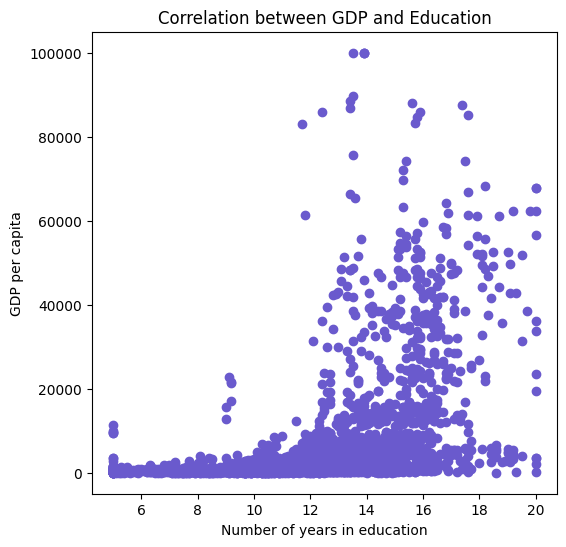

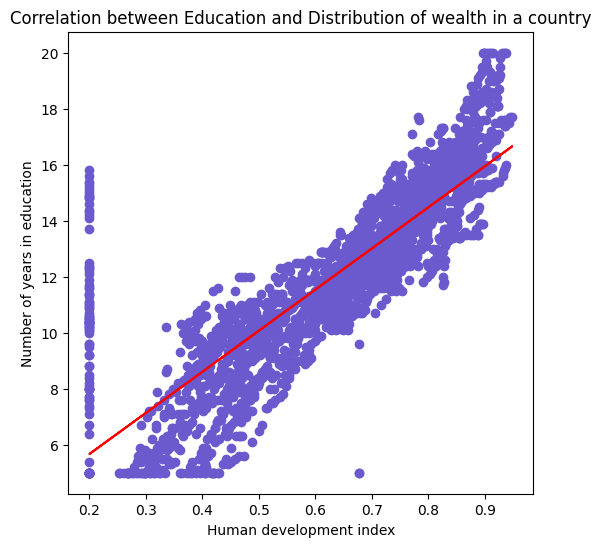

In [22]:
# feature on feature correlation
x= df['Schooling']
y = df['GDP']

plt.figure(figsize=(6,6))
slope, intercept = np.polyfit(x, y, 1)
plt.xlabel('Number of years in education')
plt.ylabel('GDP per capita')
plt.title('Correlation between GDP and Education')
plt.scatter(x, y, color='slateblue')
plt.show

y= df['Schooling']
x = df['Incomecompositionofresources']

plt.figure(figsize=(6,6))
slope, intercept = np.polyfit(x, y, 1)
x_values = np.array(x)
y_values = slope * x_values + intercept
plt.plot(x_values, y_values, color='red')
plt.ylabel('Number of years in education')
plt.xlabel('Human development index')
plt.title('Correlation between Education and Distribution of wealth in a country')
plt.scatter(x, y, color='slateblue')
plt.show

## Histograms

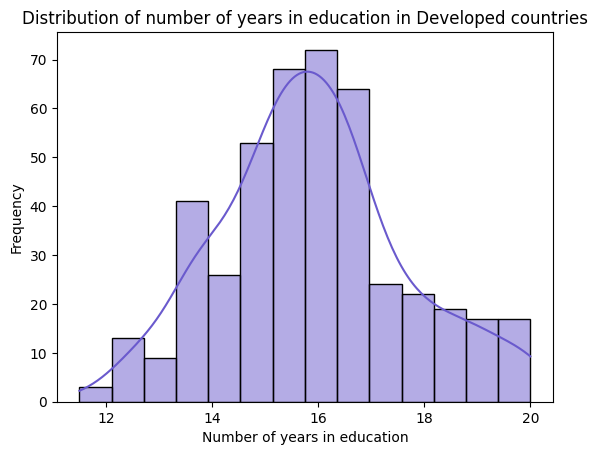

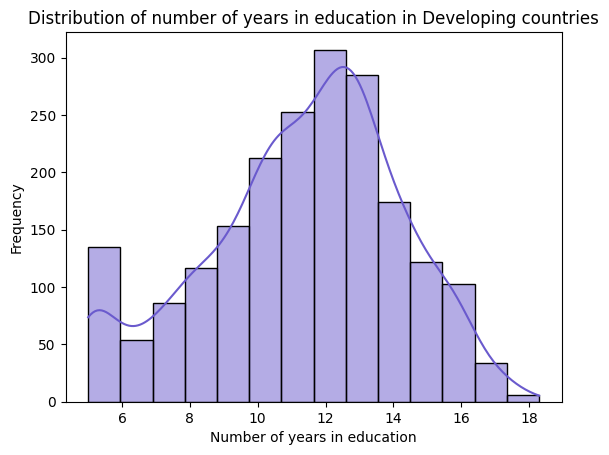

In [23]:
data = df[df['Developed'] == 1]['Schooling']
bin_edges = np.linspace(min(data), max(data), 15)
sns.histplot(data, bins=bin_edges, color='slateblue', edgecolor='black', kde=True)
plt.xlabel('Number of years in education')
plt.ylabel('Frequency')
plt.title('Distribution of number of years in education in Developed countries')
plt.show()


data = df[df['Developing'] == 1]['Schooling']
bin_edges = np.linspace(min(data), max(data), 15)
sns.histplot(data, bins=bin_edges, color='slateblue', edgecolor='black', kde=True)
plt.xlabel('Number of years in education')
plt.ylabel('Frequency')
plt.title('Distribution of number of years in education in Developing countries')
plt.show()


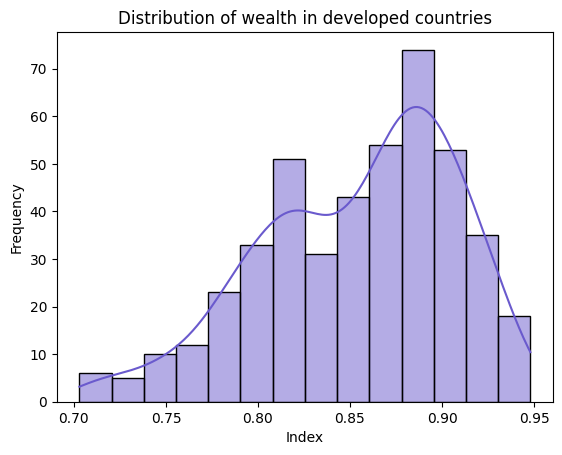

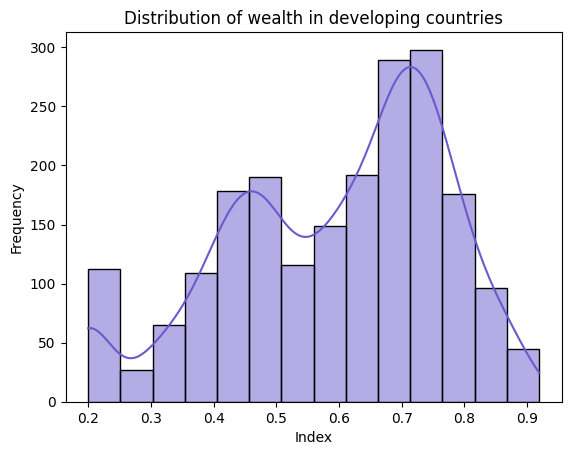

In [24]:
data = df[df['Developed'] == 1]['Incomecompositionofresources']
bin_edges = np.linspace(min(data), max(data), 15)
sns.histplot(data, bins=bin_edges, color='slateblue', edgecolor='black', kde=True)
plt.xlabel('Index')
plt.ylabel('Frequency')
plt.title('Distribution of wealth in developed countries')
plt.show()


data = df[df['Developing'] == 1]['Incomecompositionofresources']
bin_edges = np.linspace(min(data), max(data), 15)
sns.histplot(data, bins=bin_edges, color='slateblue', edgecolor='black', kde=True)
plt.xlabel('Index')
plt.ylabel('Frequency')
plt.title('Distribution of wealth in developing countries')
plt.show()



## Correlation Matrix

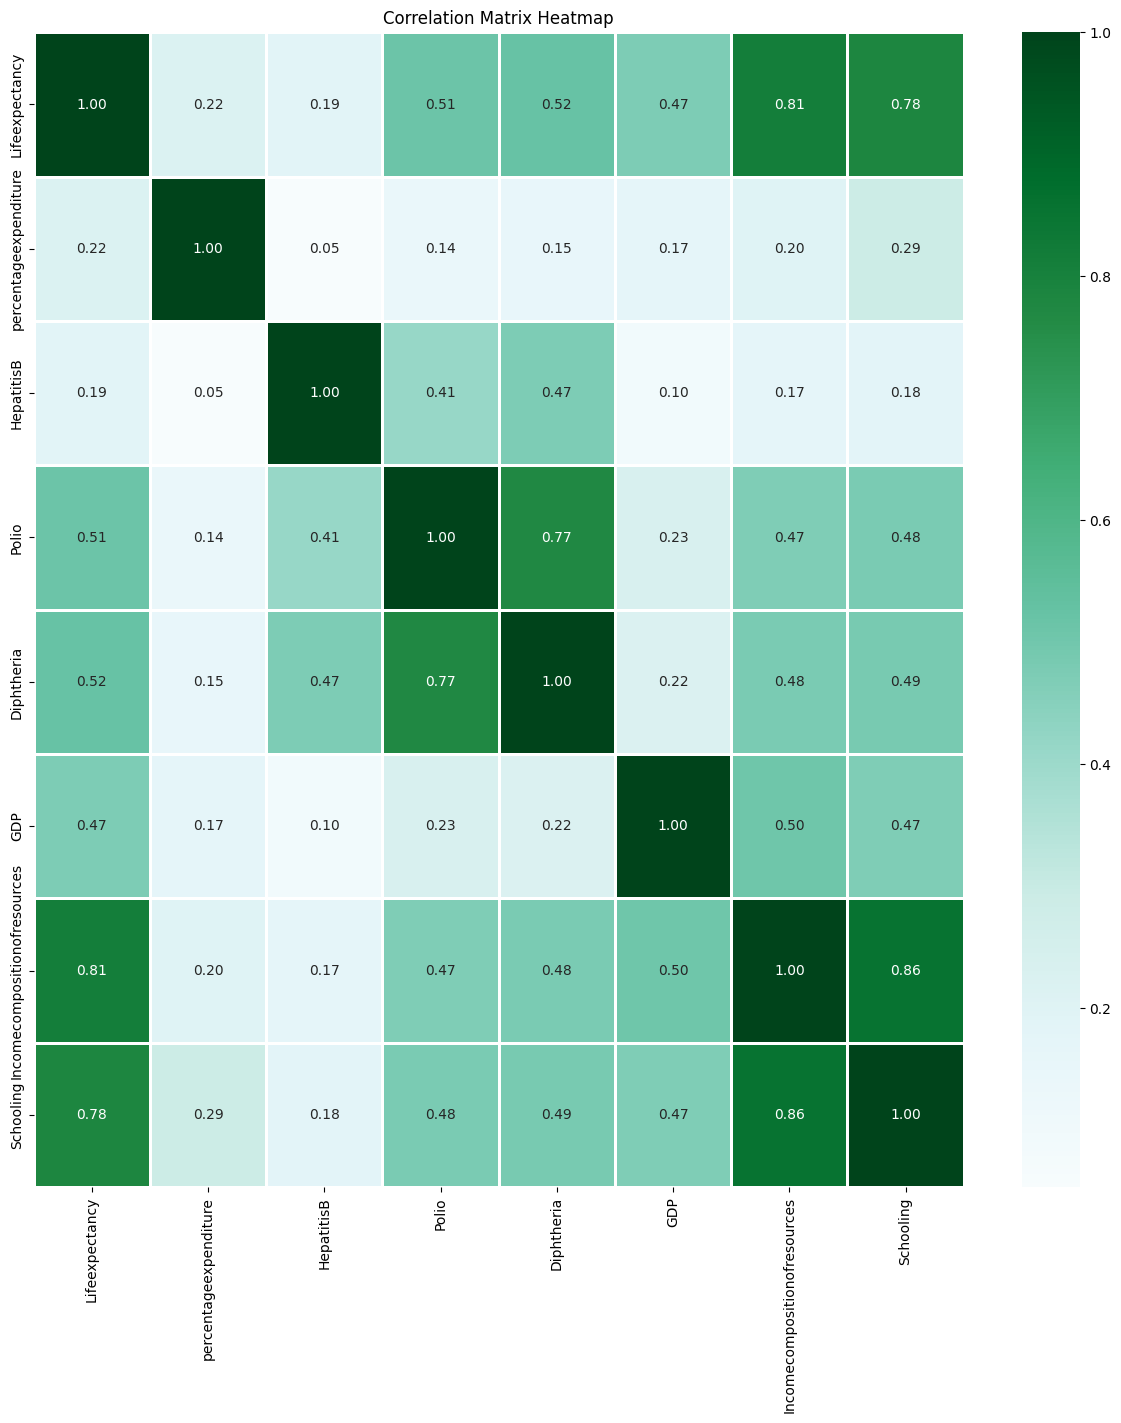

In [25]:
# Compute the correlation matrix
correlation_features = df[['Lifeexpectancy',  'percentageexpenditure', 'HepatitisB', 'Polio', 'Diphtheria','GDP', 'Incomecompositionofresources', 'Schooling']]
correlation_matrix = correlation_features.corr()

# Generate a heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='BuGn', fmt=".2f", linewidths=0.9)
plt.title('Correlation Matrix Heatmap')
plt.show()

# **Data Standardisation**

In [26]:
from sklearn import preprocessing
df_copy = df.copy()
std_life_expectancy = df_copy['Lifeexpectancy'].std()
mean_life_expectancy = df_copy['Lifeexpectancy'].mean()
scaler = preprocessing.RobustScaler()
column_names = ['Schooling', 'Incomecompositionofresources', 'GDP', 'percentageexpenditure', 'Polio', 'Diphtheria', 'HepatitisB', 'Lifeexpectancy']
scaled_data = scaler.fit_transform(df[column_names])
df = pd.DataFrame(scaled_data, columns=column_names)
df.reset_index(drop=True, inplace=True)

columns_to_add = ['Developed', 'Developing', 'Europe', 'North America', 'South America', 'Africa', 'Asia', 'Oceania']
df = pd.concat([df, df_copy[columns_to_add]], axis=1)

# **Dimensionality Reduction**


In [27]:
from sklearn.decomposition import PCA

vaccinations = df[["HepatitisB", "Polio", "Diphtheria"]]
pca = PCA(n_components=1)
Vaccinations_reduced = pca.fit_transform(vaccinations)


SocialGroup = df[["GDP", "Schooling", "Incomecompositionofresources", "percentageexpenditure"]]
SocialGroup_reduced = pca.fit_transform(SocialGroup)




# **Data Splitting**

In [28]:
from sklearn.model_selection import train_test_split

df = df.sample(frac = 1)

#GDP
GDP_train_val, GDP_test = train_test_split(df["GDP"], test_size=0.1, random_state=42)
GDP_train, GDP_val = train_test_split(GDP_train_val, test_size=0.2, random_state=42)

#Schooling
Schooling_train_val, Schooling_test = train_test_split(df["Schooling"], test_size=0.1, random_state=42)
Schooling_train, Schooling_val = train_test_split(Schooling_train_val, test_size=0.2, random_state=42)

#IncomeCompositionOfResources
IncomeCompositionOfResources_train_val, IncomeCompositionOfResources_test = train_test_split(df["Incomecompositionofresources"], test_size=0.1, random_state=42)
IncomeCompositionOfResources_train, IncomeCompositionOfResources_val = train_test_split(IncomeCompositionOfResources_train_val, test_size=0.2, random_state=42)

#PercentageExpenditure
PercentageExpenditure_train_val, PercentageExpenditure_test = train_test_split(df["percentageexpenditure"], test_size=0.1, random_state=42)
PercentageExpenditure_train, PercentageExpenditure_val = train_test_split(PercentageExpenditure_train_val, test_size=0.2, random_state=42)

#LifeExpectancy
LifeExpectancy_train_val, LifeExpectancy_test = train_test_split(df["Lifeexpectancy"], test_size=0.1, random_state=42)
LifeExpectancy_train, LifeExpectancy_val = train_test_split(LifeExpectancy_train_val, test_size=0.2, random_state=42)

#Vaccinations
Vaccinations_train_val, Vaccinations_test = train_test_split(Vaccinations_reduced, test_size=0.1, random_state=42)
Vaccinations_train, Vaccinations_val = train_test_split(Vaccinations_train_val, test_size=0.2, random_state=42)

#Continents
Continents = df[["Europe", "North America", "Oceania", "South America", "Africa", "Asia"]]
Development_status = df[['Developing', 'Developed']]
Continents_train_val, Continents_test = train_test_split(Continents, test_size=0.1, random_state=42)
Continents_train, Continents_val = train_test_split(Continents_train_val, test_size=0.2, random_state=42)

#HepatitisB
HepatitisB_train_val, HepatitisB_test = train_test_split(df["HepatitisB"], test_size=0.1, random_state=42)
HepatitisB_train, HepatitisB_val = train_test_split(HepatitisB_train_val, test_size=0.2, random_state=42)

#Polio
Polio_train_val, Polio_test = train_test_split(df["Polio"], test_size=0.1, random_state=42)
Polio_train, Polio_val = train_test_split(Polio_train_val, test_size=0.2, random_state=42)

#Diphtheria
Diphtheria_train_val, Diphtheria_test = train_test_split(df["Diphtheria"], test_size=0.1, random_state=42)
Diphtheria_train, Diphtheria_val = train_test_split(Diphtheria_train_val, test_size=0.2, random_state=42)

#Development
Development_status_train_val, Development_status_test = train_test_split(Development_status, test_size=0.1, random_state=42)
Development_status_train, Development_status_val = train_test_split(Development_status_train_val, test_size=0.2, random_state=42)

#SocialGroup
SocialGroup_reduced_train_val, SocialGroup_reduced_test = train_test_split(SocialGroup_reduced, test_size=0.1, random_state=42)
SocialGroup_reduced_train, SocialGroup_reduced_val = train_test_split(SocialGroup_reduced_train_val, test_size=0.2, random_state=42)



# **Model Implementations**

## Main Question Model Comparisons

### Does your social group affect life expectancy: Linear (and Polynomial Regression)

Linear Regression

In [29]:
# initialise for displaying purposes
all_mse = {}
all_r2 = {}

In [30]:

#training main question with linear regression
from sklearn.linear_model import LinearRegression
import numpy as np

X_train = np.column_stack((GDP_train, Schooling_train, IncomeCompositionOfResources_train, PercentageExpenditure_train))
model = LinearRegression()
model.fit(X_train, LifeExpectancy_train)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)



Coefficients: [0.01867749 0.3222669  0.57800266 0.01018275]
Intercept: -0.12886235147203567


In [31]:
#testing main questions with linear regression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


X_test = np.column_stack((GDP_test, Schooling_test, IncomeCompositionOfResources_test, PercentageExpenditure_test))
y_pred= model.predict(X_test)
linear_mse = mean_squared_error(LifeExpectancy_test, y_pred)
print("Linear Regression metrics")
print("Mean squared error:", linear_mse)
linear_r2 = r2_score(LifeExpectancy_test, y_pred)
print("r2: ", linear_r2)
all_mse["Linear Regression"] = linear_mse
all_r2["Linear Regression"] = linear_r2


Linear Regression metrics
Mean squared error: 0.1372416812881874
r2:  0.7367134893238094


In [32]:
X_test = np.column_stack((GDP_test, Schooling_test, IncomeCompositionOfResources_test, PercentageExpenditure_test))
prediction = model.predict(X_test)
prediction_unstandard = (prediction * std_life_expectancy) + mean_life_expectancy
prediction_unstandard

array([62.76053485, 64.30503903, 76.26944723, 68.09948317, 75.94446131,
       64.54508498, 67.52182402, 62.33785469, 74.13284013, 61.87336299,
       62.94395104, 68.98654107, 74.2147886 , 71.44706199, 72.42309921,
       59.77264075, 69.25466442, 64.40700991, 69.13786325, 71.50912546,
       72.43731963, 58.25079579, 69.03519415, 66.23944062, 62.00520797,
       70.22246684, 66.88651194, 62.89687507, 75.75398254, 74.76231413,
       72.66317302, 76.09437914, 63.46274162, 69.10474863, 70.35548668,
       69.81647356, 58.12647822, 71.45302494, 71.40301682, 56.51344415,
       65.19237773, 68.92474658, 58.72365009, 65.65963454, 78.19454703,
       68.37219654, 69.06233173, 70.3381115 , 70.44154212, 61.63290174,
       64.97196   , 62.0748357 , 64.04230847, 69.81585972, 60.29931769,
       65.80652447, 74.89037184, 62.10152346, 70.80053393, 72.28666092,
       72.04041155, 66.94657608, 54.72286505, 60.54123375, 65.94587791,
       67.96717539, 60.83272112, 66.24065478, 62.77635228, 61.32

<ipython-input-33-08ab30d235f1>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([LifeExpectancy_test.min(), LifeExpectancy_test.max()], [LifeExpectancy_test.min(), LifeExpectancy_test.max()], 'k--', lw=4, color='red', label='Ideal Prediction')


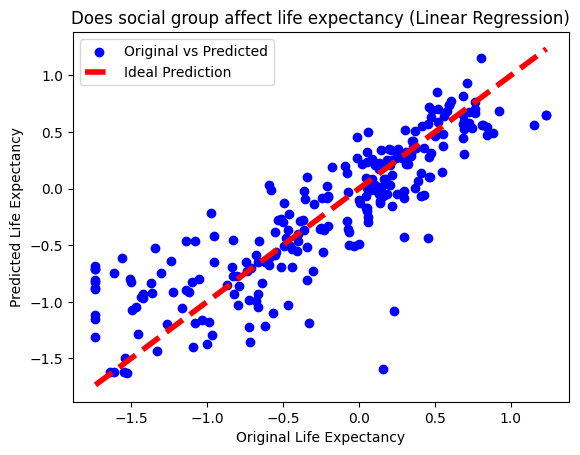

In [33]:
import matplotlib.pyplot as plt

plt.scatter(LifeExpectancy_test, y_pred, color='blue', label='Original vs Predicted')
plt.plot([LifeExpectancy_test.min(), LifeExpectancy_test.max()], [LifeExpectancy_test.min(), LifeExpectancy_test.max()], 'k--', lw=4, color='red', label='Ideal Prediction')
plt.xlabel('Original Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title('Does social group affect life expectancy (Linear Regression)')
plt.legend()
plt.show()


Polynomial Regression without PCA

In [34]:
#Polynomial regression without PCA
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np

X_train = np.column_stack((GDP_train, Schooling_train, IncomeCompositionOfResources_train, PercentageExpenditure_train))
poly = PolynomialFeatures(degree=3)
X_poly_train = poly.fit_transform(X_train)
model = LinearRegression()
model.fit(X_poly_train, LifeExpectancy_train)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Coefficients: [ 6.83957998e-14 -1.77959039e-01 -4.00332499e-01  1.66999301e+00
  1.07634940e-01  2.10264949e-02 -1.19199132e-01  3.63639739e-01
  6.12354099e-02 -6.45604586e-02  7.06073559e-01 -1.41138577e-01
 -1.15098625e+00  1.44069738e-01  4.30695447e-02  1.27476875e-03
  7.97955250e-03 -8.45006555e-02  8.89760085e-03 -7.39193435e-02
  2.03876675e-01  4.05033528e-02  3.28788900e-01 -2.73703381e-01
  3.82163228e-03  3.06296742e-03 -8.85766111e-02 -6.91262798e-02
  8.20031211e-01  6.72910147e-02  7.12399355e-02 -1.28417082e+00
  7.08833505e-02  4.71144160e-03 -2.88328486e-02]
Intercept: -0.03316744417919612


In [35]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import numpy as np


X_val = np.column_stack((GDP_val, Schooling_val, IncomeCompositionOfResources_val, PercentageExpenditure_val))
pipeline = Pipeline([
    ('poly', PolynomialFeatures()),
    ('linear', LinearRegression())
])
param_grid = {
    'poly__degree': [1, 2, 3, 4, 5]
}
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_val, LifeExpectancy_val)
print("Best negative mean squared error:", grid_search.best_score_)
print("Best parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_


Best negative mean squared error: -0.14747117716032054
Best parameters: {'poly__degree': 2}


In [36]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


X_test = np.column_stack((GDP_test, Schooling_test, IncomeCompositionOfResources_test, PercentageExpenditure_test))
X_poly_test = poly.transform(X_test)
y_pred_test = model.predict(X_poly_test)
polynomial_mse_test = mean_squared_error(LifeExpectancy_test, y_pred_test)
print("Mean squared error:", polynomial_mse_test)
polynomial_r2 = r2_score(LifeExpectancy_test, y_pred)
print("r2: ", polynomial_r2)
all_mse["Polynomial Regression"] = polynomial_mse_test
all_r2["Polynomial Regression"] = polynomial_r2


Mean squared error: 0.07831409060156848
r2:  0.7367134893238094


In [37]:
X_test = np.column_stack((GDP_test, Schooling_test, IncomeCompositionOfResources_test, PercentageExpenditure_test))
X_poly = poly.transform(X_test)
y_pred = model.predict(X_poly)
y_pred_unstandard = (y_pred * std_life_expectancy) + mean_life_expectancy
y_pred_unstandard

array([61.42385417, 64.17466449, 73.66205795, 70.9325296 , 76.38618451,
       63.52033602, 64.70097785, 60.20590284, 74.21352296, 58.04088619,
       58.33573446, 71.496509  , 72.91451969, 72.3097566 , 71.32667995,
       62.71964639, 69.24274847, 62.37722922, 69.99442576, 72.71670241,
       73.43306539, 64.65752408, 69.79279991, 68.65662943, 58.02100295,
       69.81174011, 67.12499396, 58.90247814, 76.28778584, 76.03723623,
       69.98073729, 77.61886354, 59.54319584, 71.62387852, 69.21472048,
       72.54339955, 59.51240361, 71.20022971, 71.66325224, 57.03058665,
       67.11858669, 69.1501255 , 59.59217112, 64.93989969, 79.08358029,
       67.65984717, 71.09632373, 71.54409173, 72.94936176, 59.97246079,
       65.55093829, 58.97765119, 60.0585628 , 72.5779989 , 63.08188691,
       66.25138649, 76.3027813 , 57.56133113, 70.43196169, 72.50354857,
       72.57649253, 67.73120746, 67.63789404, 56.13118026, 63.87217836,
       68.17202881, 56.99951448, 67.48687452, 61.9316892 , 56.62

<ipython-input-38-f005e8473b73>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([LifeExpectancy_test.min(), LifeExpectancy_test.max()], [LifeExpectancy_test.min(), LifeExpectancy_test.max()], 'k--', lw=4, color='red', label='Ideal Prediction')


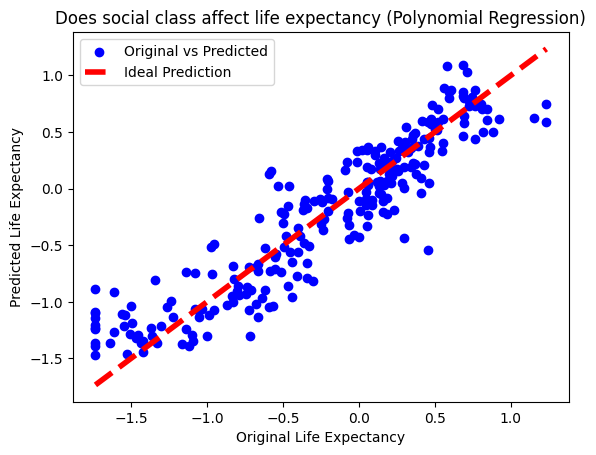

In [38]:
import matplotlib.pyplot as plt

plt.scatter(LifeExpectancy_test, y_pred_test, color='blue', label='Original vs Predicted')
plt.plot([LifeExpectancy_test.min(), LifeExpectancy_test.max()], [LifeExpectancy_test.min(), LifeExpectancy_test.max()], 'k--', lw=4, color='red', label='Ideal Prediction')
plt.xlabel('Original Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title('Does social class affect life expectancy (Polynomial Regression)')
plt.legend()
plt.show()


Polynomial Regression with PCA

In [39]:

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

pipeline = Pipeline([
    ('poly', PolynomialFeatures()),
    ('regressor', LinearRegression())
])

param_grid = {
    'poly__degree': [1, 2, 3, 4]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(SocialGroup_reduced_train, LifeExpectancy_train)
best_model = grid_search.best_estimator_

print("Best degree of polynomial features:", best_model.named_steps['poly'].degree)



Best degree of polynomial features: 3


In [40]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np

poly = PolynomialFeatures(degree=3)
X_poly_train = poly.fit_transform(SocialGroup_reduced_train)
model = LinearRegression()
model.fit(X_poly_train, LifeExpectancy_train)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Coefficients: [ 0.         -0.0508753   0.00920075 -0.00045348]
Intercept: -0.24797907735509392


In [41]:
from sklearn.metrics import mean_squared_error, r2_score

X_test = poly.transform(SocialGroup_reduced_test)
predictions = model.predict(X_test)
mse = mean_squared_error(LifeExpectancy_test, predictions)
print("Mean Squared Error:", mse)
r2 = r2_score(LifeExpectancy_test, predictions)
print("R-squared:", r2)


Mean Squared Error: 0.5189292994232796
R-squared: 0.004478207710829962


In [42]:
predictions = best_model.predict(SocialGroup_reduced_test)
predictions_unstandard = (predictions * std_life_expectancy) + mean_life_expectancy
predictions_unstandard

array([67.60121747, 68.28993224, 67.99642872, 67.99001532, 67.18935504,
       67.99612235, 67.68286792, 68.1326663 , 68.13044455, 68.07917753,
       68.14988113, 68.18554688, 67.42436215, 68.03478206, 66.42143361,
       67.57707753, 66.76801501, 67.84354416, 67.51730429, 67.18937562,
       67.49035345, 67.80017857, 67.94003589, 67.72183937, 68.07663372,
       68.23255928, 68.16322138, 66.48386767, 68.2271909 , 67.87838853,
       68.20066022, 66.64402962, 67.33344989, 66.52027831, 66.45742914,
       68.30134779, 66.82547175, 67.95111435, 66.52201527, 66.92685888,
       68.02580649, 66.78792708, 68.06431359, 68.13983476, 66.79690566,
       68.18032897, 68.16758682, 67.48220871, 67.64118023, 67.80544924,
       67.30921296, 67.56179451, 66.5439829 , 67.44323968, 67.84171073,
       68.24643663, 66.45602082, 67.88927783, 67.95355257, 66.78528243,
       67.72056307, 67.27439709, 67.74569315, 67.44124269, 68.12642759,
       68.3473257 , 68.29977918, 67.5228004 , 67.24718513, 63.38

### Does your social group affect life expectancy: Lasso Regression

In [47]:
# does social class affect life expectancy lasso regression

from sklearn.linear_model import Lasso
import numpy as np

# train lasso regression model
lasso_model = Lasso(alpha=0.1)  # Using Lasso with alpha=0.1
X_train = np.column_stack((GDP_train, Schooling_train, IncomeCompositionOfResources_train, PercentageExpenditure_train))
lasso_model.fit(X_train, LifeExpectancy_train)

print("Coefficients:", lasso_model.coef_)
print("Intercept:", lasso_model.intercept_)

Coefficients: [0.03936311 0.30366107 0.30994343 0.        ]
Intercept: -0.18800586804053815


In [48]:
# test lasso regression model
from sklearn.metrics import mean_squared_error
X_test = np.column_stack((GDP_test, Schooling_test, IncomeCompositionOfResources_test, PercentageExpenditure_test))
y_pred_lasso = lasso_model.predict(X_test)
mse_lasso = mean_squared_error(LifeExpectancy_test, y_pred_lasso)
print("Mean squared error:", mse_lasso)


Mean squared error: 0.1690931960253355


In [49]:
# test using r2 score
from sklearn.metrics import r2_score
r2 = r2_score(LifeExpectancy_test, y_pred_lasso)
print("R2 Score:", r2)

R2 Score: 0.6756090632035446


In [51]:
# optimising lasso model
from sklearn.model_selection import GridSearchCV
lasso_model = Lasso()

# create dictionary of hyperparameters to search
hyperparameters = {
    'alpha': [0.001, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]
}

# create grid search object
grid_search = GridSearchCV(lasso_model, hyperparameters, cv=5, scoring='neg_mean_squared_error')

# fit model
X = np.column_stack((GDP_train, Schooling_train, IncomeCompositionOfResources_train, PercentageExpenditure_train))
grid_search.fit(X, LifeExpectancy_train)

# get best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best hyperparameters: {'alpha': 0.001}
Best score: -0.16202938129030756


In [52]:
# retrain lasso model with best hyperparameters
lasso_model = Lasso(alpha=0.001)
X = np.column_stack((GDP_train, PercentageExpenditure_train))
lasso_model.fit(X, LifeExpectancy_train)

# testing lasso model with best hyperparameters
X_test = np.column_stack((GDP_test, Schooling_test, IncomeCompositionOfResources_test, PercentageExpenditure_test))
y_pred_lasso = grid_search.predict(X_test)
mse_lasso = mean_squared_error(LifeExpectancy_test, y_pred_lasso)
print("Mean squared error:", mse_lasso)

Mean squared error: 0.13730258691517627


In [54]:
# testing lasso regression model using r2 score and best hyperparameters
r2 = r2_score(LifeExpectancy_test, y_pred_lasso)
print("R2 Score:", r2)


R2 Score: 0.7365966470506755


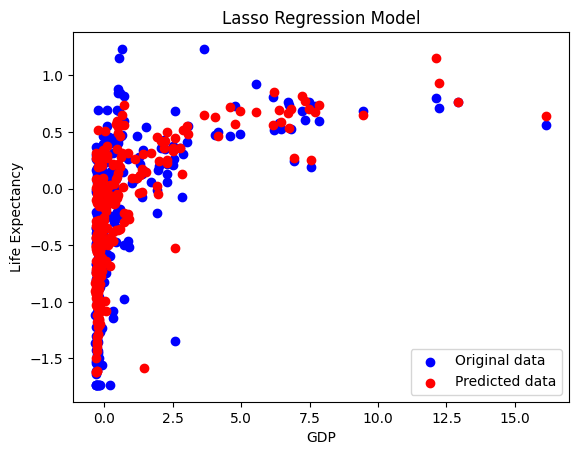

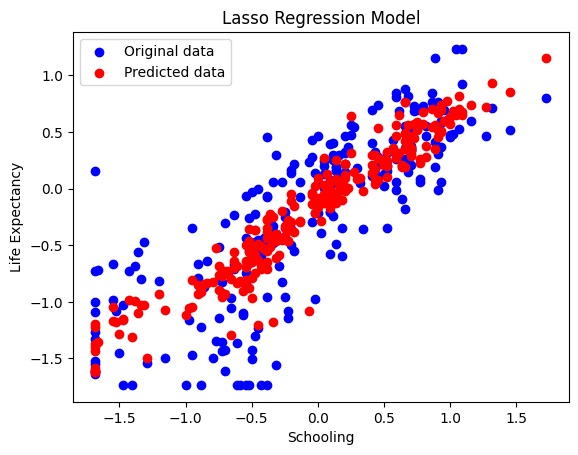

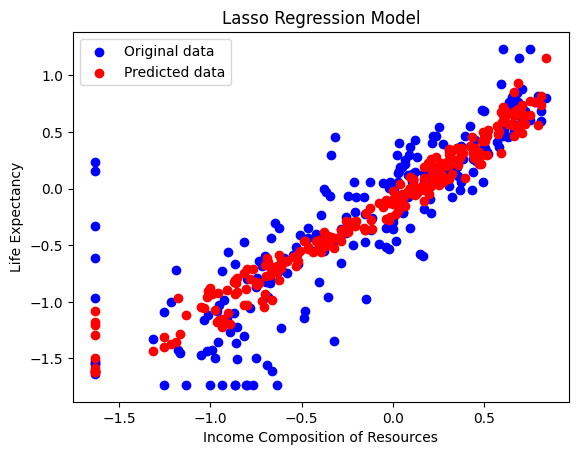

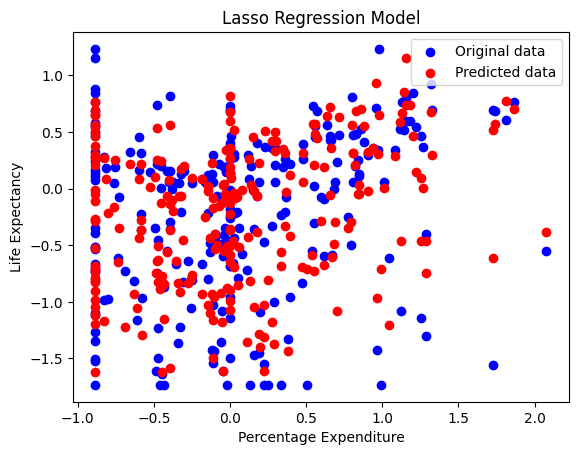

In [55]:
# displaying lasso regression model
import matplotlib.pyplot as plt

plt.scatter(GDP_test, LifeExpectancy_test, color='blue', label='Original data')
plt.scatter(GDP_test, y_pred_lasso, color='red', label='Predicted data')
plt.xlabel('GDP')
plt.ylabel('Life Expectancy')
plt.title('Lasso Regression Model')
plt.legend()
plt.show()

plt.scatter(Schooling_test, LifeExpectancy_test, color='blue', label='Original data')
plt.scatter(Schooling_test, y_pred_lasso, color='red', label='Predicted data')
plt.xlabel('Schooling')
plt.ylabel('Life Expectancy')
plt.title('Lasso Regression Model')
plt.legend()
plt.show()

plt.scatter(IncomeCompositionOfResources_test, LifeExpectancy_test, color='blue', label='Original data')
plt.scatter(IncomeCompositionOfResources_test, y_pred_lasso, color='red', label='Predicted data')
plt.xlabel('Income Composition of Resources')
plt.ylabel('Life Expectancy')
plt.title('Lasso Regression Model')
plt.legend()
plt.show()

plt.scatter(PercentageExpenditure_test, LifeExpectancy_test, color='blue', label='Original data')
plt.scatter(PercentageExpenditure_test, y_pred_lasso, color='red', label='Predicted data')
plt.xlabel('Percentage Expenditure')
plt.ylabel('Life Expectancy')
plt.title('Lasso Regression Model')
plt.legend()
plt.show()

Predicted Life Expectancy: [1896.1753301]


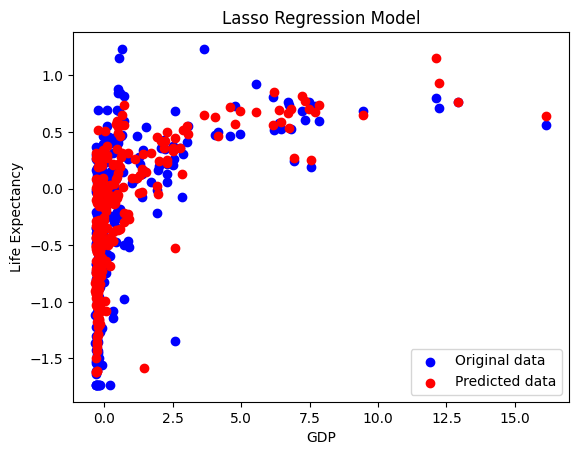

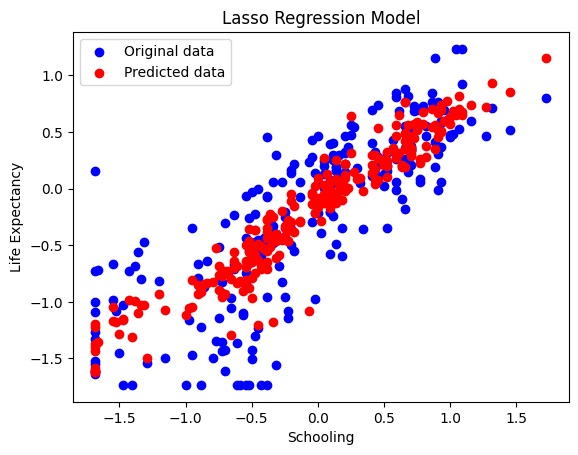

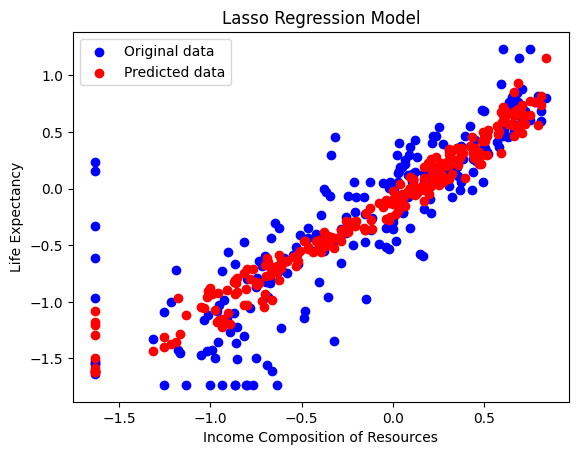

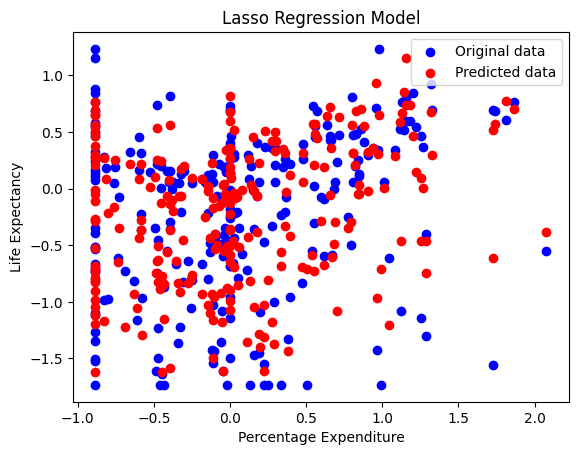

In [56]:
# making predictions with lasso regression model
new_GDP = 100000
new_Schooling = 10
new_IncomeCompositionOfResources = 0.8
new_PercentageExpenditure = 5
X_new = np.array([[new_GDP, new_Schooling, new_IncomeCompositionOfResources, new_PercentageExpenditure]])
predicted_life_expectancy_lasso = grid_search.predict(X_new)
print("Predicted Life Expectancy:", predicted_life_expectancy_lasso)

plt.scatter(GDP_test, LifeExpectancy_test, color='blue', label='Original data')
plt.scatter(GDP_test, y_pred_lasso, color='red', label='Predicted data')
plt.xlabel('GDP')
plt.ylabel('Life Expectancy')
plt.title('Lasso Regression Model')
plt.legend()
plt.show()

plt.scatter(Schooling_test, LifeExpectancy_test, color='blue', label='Original data')
plt.scatter(Schooling_test, y_pred_lasso, color='red', label='Predicted data')
plt.xlabel('Schooling')
plt.ylabel('Life Expectancy')
plt.title('Lasso Regression Model')
plt.legend()
plt.show()

plt.scatter(IncomeCompositionOfResources_test, LifeExpectancy_test, color='blue', label='Original data')
plt.scatter(IncomeCompositionOfResources_test, y_pred_lasso, color='red', label='Predicted data')
plt.xlabel('Income Composition of Resources')
plt.ylabel('Life Expectancy')
plt.title('Lasso Regression Model')
plt.legend()
plt.show()

plt.scatter(PercentageExpenditure_test, LifeExpectancy_test, color='blue', label='Original data')
plt.scatter(PercentageExpenditure_test, y_pred_lasso, color='red', label='Predicted data')
plt.xlabel('Percentage Expenditure')
plt.ylabel('Life Expectancy')
plt.title('Lasso Regression Model')
plt.legend()
plt.show()

### Doesyour social group affect life expectancy: Elastic Net Regression

In [ ]:
# Does social class affect life expectancy
from sklearn.linear_model import ElasticNet
import numpy as np

# train elastic net regression model
elastic_net_model = ElasticNet(alpha=0.1, l1_ratio=0.5)  # Using Elastic Net with alpha=0.1 and l1_ratio=0.5
X_train = np.column_stack((GDP_train, Schooling_train, IncomeCompositionOfResources_train, PercentageExpenditure_train))
elastic_net_model.fit(X_train, LifeExpectancy_train)

In [ ]:
print("Coefficients:", elastic_net_model.coef_)
print("Intercept:", elastic_net_model.intercept_)

In [ ]:
# testing elastic net regression model
from sklearn.metrics import mean_squared_error

X_test = np.column_stack((GDP_test, Schooling_test, IncomeCompositionOfResources_test, PercentageExpenditure_test))
y_pred_elastic_net = elastic_net_model.predict(X_test)
mse_elastic_net = mean_squared_error(LifeExpectancy_test, y_pred_elastic_net)
print("Mean squared error:", mse_elastic_net)

In [ ]:
# testing elastic net regression model using r2 score
from sklearn.metrics import r2_score

r2_elastic_net = r2_score(LifeExpectancy_test, y_pred_elastic_net)
print("R2 Score:", r2_elastic_net)

In [ ]:
#Optimising the model
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
import numpy as np

# create Elastic Net model
elastic_net_model = ElasticNet()

# create a dictionary of hyperparameters to search
search_parameters = {
    'alpha': [0.01, 0.04, 0.05, 0.06, 0.07,0.075, 0.1,],
    'l1_ratio': [0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.5]
}

# create grid search object
grid_search = GridSearchCV(elastic_net_model, search_parameters, cv=5, scoring='neg_mean_squared_error')

# fit model
X = np.column_stack((GDP_train, PercentageExpenditure_train))
grid_search.fit(X, LifeExpectancy_train)

# get best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


In [ ]:
# retrain elastic net model with best hyperparameters
elastic_net_model = ElasticNet(alpha=0.075, l1_ratio=0.01)
X = np.column_stack((GDP_train, PercentageExpenditure_train, Schooling_train, IncomeCompositionOfResources_train))
elastic_net_model.fit(X, LifeExpectancy_train)


In [ ]:
# testing elastic net regression model with best hyperparameters
from sklearn.metrics import mean_squared_error

X_test = np.column_stack((GDP_test, Schooling_test, IncomeCompositionOfResources_test, PercentageExpenditure_test))
y_pred_elastic_net = elastic_net_model.predict(X_test)
mse_elastic_net = mean_squared_error(LifeExpectancy_test, y_pred_elastic_net)
print("Mean squared error:", mse_elastic_net)

# testing elastic net regression model using r2 score and best hyperparameters
from sklearn.metrics import r2_score

mse_r2 = r2_score(LifeExpectancy_test, y_pred_elastic_net)
print("R2 Score:", r2)

all_mse["Elastic Net Regression"] = mse_elastic_net
all_r2["Elastic Net Regression"] = mse_r2


In [ ]:
#displaying elastic net regression model
import matplotlib.pyplot as plt

plt.scatter(GDP_test, LifeExpectancy_test, color='blue', label='Original data')
plt.scatter(GDP_test, y_pred_elastic_net, color='red', label='Predicted data')
plt.xlabel('GDP')
plt.ylabel('Life Expectancy')
plt.title('Elastic Net Regression Model')
plt.legend()
plt.show()

plt.scatter(Schooling_test, LifeExpectancy_test, color='blue', label='Original data')
plt.scatter(Schooling_test, y_pred_elastic_net, color='red', label='Predicted data')
plt.xlabel('Schooling')
plt.ylabel('Life Expectancy')
plt.title('Elastic Net Regression Model')
plt.legend()
plt.show()

plt.scatter(IncomeCompositionOfResources_test, LifeExpectancy_test, color='blue', label='Original data')
plt.scatter(IncomeCompositionOfResources_test, y_pred_elastic_net, color='red', label='Predicted data')
plt.xlabel('Income Composition of Resources')
plt.ylabel('Life Expectancy')
plt.title('Elastic Net Regression Model')
plt.legend()
plt.show()

plt.scatter(PercentageExpenditure_test, LifeExpectancy_test, color='blue', label='Original data')
plt.scatter(PercentageExpenditure_test, y_pred_elastic_net, color='red', label='Predicted data')
plt.xlabel('Percentage Expenditure')
plt.ylabel('Life Expectancy')
plt.title('Elastic Net Regression Model')
plt.legend()
plt.show()


In [ ]:
#making predictions with elastic net regression model

new_GDP = 100000
new_Schooling = 10
new_IncomeCompositionOfResources = 0.8
new_PercentageExpenditure = 5
X_new = np.array([[new_GDP, new_Schooling, new_IncomeCompositionOfResources, new_PercentageExpenditure]])
# Fit the elastic net regression model before making predictions
elastic_net_model.fit(X_train, LifeExpectancy_train)
predicted_life_expectancy_elastic_net = elastic_net_model.predict(X_new)
print("Predicted Life Expectancy:", predicted_life_expectancy_elastic_net)


### Does your social group affect your life expectancy: Random Forest Regression

In [ ]:
# Does social group affect life expectancy: Random Forest

# reshape data
from sklearn.ensemble import RandomForestRegressor
import numpy as np
GDP_train= GDP_train.to_numpy().reshape(-1, 1)
Schooling_train = Schooling_train.to_numpy().reshape(-1, 1)
IncomeCompositionOfResources_train = IncomeCompositionOfResources_train.to_numpy().reshape(-1, 1)
PercentageExpenditure_train = PercentageExpenditure_train.to_numpy().reshape(-1, 1)

GDP_test = GDP_test.to_numpy().reshape(-1, 1)
Schooling_test = Schooling_test.to_numpy().reshape(-1, 1)
IncomeCompositionOfResources_test = IncomeCompositionOfResources_test.to_numpy().reshape(-1, 1)
PercentageExpenditure_test = PercentageExpenditure_test.to_numpy().reshape(-1, 1)

GDP_val = GDP_val.to_numpy().reshape(-1, 1)
Schooling_val = Schooling_val.to_numpy().reshape(-1, 1)
IncomeCompositionOfResources_val = IncomeCompositionOfResources_val.to_numpy().reshape(-1, 1)
PercentageExpenditure_val = PercentageExpenditure_val.to_numpy().reshape(-1, 1)



In [ ]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# train model

#establish training features
X_train = np.concatenate((GDP_train, Schooling_train, IncomeCompositionOfResources_train, PercentageExpenditure_train), axis = 1)
m = len(X_train)
X_train_with_bias = np.concatenate((np.ones((m,1)), X_train), axis=1)
y_train = LifeExpectancy_train

# fit model
regressor = RandomForestRegressor(n_estimators=10, random_state=42, oob_score=True)
regressor.fit(X_train_with_bias, y_train)

In [ ]:
# cross validation
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(regressor, X_train, y_train, cv=5, scoring='r2')
cv_scores_2 = cross_val_score(regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_scores_positive = -cv_scores_2
mean_mse = np.mean(cv_scores_positive)

print("Cross-Validation MSE:", cv_scores_positive)
print("Mean MSE:", mean_mse)
print("Cross-Validation Scores:", cv_scores)
print("Mean R-squared:", np.mean(cv_scores))

In [ ]:
def print_results(results):
    print('BEST PARAMS: {}\n '.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/_{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [ ]:
#establish validation features
X_val = np.concatenate((GDP_val, Schooling_val, IncomeCompositionOfResources_val, PercentageExpenditure_val), axis = 1)
m = len(X_val)
X_val_with_bias = np.concatenate((np.ones((m,1)), X_val), axis=1)
y_val = LifeExpectancy_val

In [ ]:
# optimise with validation data
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score

param_grid = {
    'n_estimators': [50, 100],
    'max_features': ['sqrt', 'log2','auto'],
    'max_depth': [None, 8],
    'min_samples_split': [2,3],
    'min_samples_leaf': [1, 2],
}

# Instantiate GridSearchCV
grid_search = GridSearchCV(
    RandomForestRegressor(random_state=777),
    param_grid=param_grid,
    cv=5,
    scoring='r2'
)


grid_search.fit(X_val_with_bias, y_val)
print_results(grid_search)

# Get the best parameters
best_params = grid_search.best_params_

# Instantiate a RandomForestRegressor with the best parameters
model_grid = RandomForestRegressor(**best_params, random_state=42)

# Train the model with the best parameters on the validation data
model_grid.fit(X_val_with_bias, y_val)



In [ ]:
# cross validation
cv_scores = cross_val_score(model_grid, X_train, y_train, cv=6, scoring='r2')
cv_scores_2 = cross_val_score(model_grid, X_train, y_train, cv=6, scoring='neg_mean_squared_error')
cv_scores_positive = -cv_scores_2
rf_mse = np.mean(cv_scores_positive)
rf_r2 =  np.mean(cv_scores)

print("Cross-Validation MSE:", cv_scores_positive)
print("Mean MSE:", rf_mse)
print("Cross-Validation Scores:", cv_scores)
print("Mean R-squared:", rf_r2)
all_mse["Random Forest Regression"] = rf_mse
all_r2["Random Forest Regression"] = rf_r2

In [ ]:
# test model
from sklearn.metrics import mean_squared_error, r2_score

X_test = np.concatenate((GDP_test, Schooling_test, IncomeCompositionOfResources_test, PercentageExpenditure_test), axis = 1)
m = len(X_test)
X_test_with_bias = np.concatenate((np.ones((m,1)), X_test), axis=1)
y_test = LifeExpectancy_test

# Make predictions on the test data
y_prediction = model_grid.predict(X_test_with_bias)


In [ ]:
# Displaying
# GDP
plt.scatter(GDP_test, y_test, color = 'blue', label = 'Original data')
plt.scatter(GDP_test, y_prediction, color = 'limegreen', label = 'Predicted data')
plt.xlabel("GDP")
plt.ylabel("Mean life expectancy")
plt.title("Random Forest Model Prediction for Life Expectancy and GDP")
plt.legend()
plt.show()

plt.scatter(Schooling_test, y_test, color = 'blue', label = 'Original data')
plt.scatter(Schooling_test, y_prediction, color = 'limegreen', label = 'Predicted data')
plt.xlabel("Average number of years spent in education")
plt.ylabel("Mean life expectancy")
plt.title("Random Forest Model Prediction for Life Expectancy and Schooling")
plt.legend()
plt.show()

plt.scatter(IncomeCompositionOfResources_test, y_test, color = 'blue', label = 'Original data')
plt.scatter(IncomeCompositionOfResources_test, y_prediction, color = 'limegreen', label = 'Predicted data')
plt.xlabel("Income composition of resources index score")
plt.ylabel("Mean life expectancy")
plt.title("Random Forest Model Prediction for Life Expectancy and Income Composition of Resources")
plt.legend()
plt.show()

plt.scatter(PercentageExpenditure_test, y_test, color = 'blue', label = 'Original data')
plt.scatter(PercentageExpenditure_test, y_prediction, color = 'limegreen', label = 'Predicted data')
plt.xlabel("Percentage expenditure (%)")
plt.ylabel("Mean life expectancy")
plt.title("Random Forest Model Prediction for Life Expectancy and Percentage of Government Expenditure on Healthcare")
plt.legend()
plt.show()

### Displaying Results

In [ ]:
all_mse = pd.Series(all_mse)
all_r2 = pd.Series(all_r2)

bar_width = 0.35
range1 = range(len(all_mse))
range2 = [x + bar_width for x in range1]

# Plot
plt.figure(figsize=(10, 6))
bars1= plt.bar(range1, all_mse, color='limegreen', width=bar_width, edgecolor='grey', label='Mean squared error')
bars2= plt.bar(range2, all_r2, color='blue', width=bar_width, edgecolor='grey', label='R squared value')
plt.xlabel('Models', fontweight='bold')
plt.ylabel('Values', fontweight='bold')
plt.xticks([r + bar_width / 2 for r in range(len(all_mse))], all_mse.index, rotation=45)
plt.title('Mean squared error and r squared value for models', fontweight='bold')
plt.legend()
for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center')

for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center')

plt.tight_layout()
plt.show()

## Sub Question Models

### Do Educated people earn more money: Lasso Regression

In [59]:
# Tiernan Do educated people earn more money?

# train lasso regression model
from sklearn.linear_model import Lasso
import numpy as np

lasso_model = Lasso(alpha=0.1)  # Using Lasso with alpha=0.1
X_train = np.column_stack((GDP_train, IncomeCompositionOfResources_train))
lasso_model.fit(X_train, Schooling_train)

print("Coefficients:", lasso_model.coef_)
print("Intercept:", lasso_model.intercept_)


Coefficients: [0.03627087 0.66368575]
Intercept: 0.003568420234083221


In [60]:
# test lasso regression model
from sklearn.metrics import mean_squared_error

X_test = np.column_stack((GDP_test, IncomeCompositionOfResources_test))
y_pred_lasso = lasso_model.predict(X_test)
mse_lasso = mean_squared_error(Schooling_test, y_pred_lasso)
print("Mean squared error:", mse_lasso)

Mean squared error: 0.15094680995614654


In [61]:
# test using r2 score
from sklearn.metrics import r2_score

r2 = r2_score(Schooling_test, y_pred_lasso)
print("R2 Score:", r2)

R2 Score: 0.729187157519288


In [62]:
# optimising lasso model
from sklearn.model_selection import GridSearchCV

lasso_model = Lasso()

# create dictionary of hyperparameters to search
hyperparameters = {
    'alpha': [0.001, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]
}

# create grid search object
grid_search = GridSearchCV(lasso_model, hyperparameters, cv=5, scoring='neg_mean_squared_error')

# fit model
X = np.column_stack((GDP_train, IncomeCompositionOfResources_train))
grid_search.fit(X, Schooling_train)

# get best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best hyperparameters: {'alpha': 0.001}
Best score: -0.14486310759572468


In [63]:
# retrain lasso model with best hyperparameters
lasso_model = Lasso(alpha=0.001)
X = np.column_stack((GDP_train, IncomeCompositionOfResources_train))
lasso_model.fit(X, Schooling_train)

Lasso(alpha=0.001)

In [64]:
# testing lasso model with best hyperparameters
X_test = np.column_stack((GDP_test, IncomeCompositionOfResources_test))
y_pred_lasso = grid_search.predict(X_test)
mse_lasso = mean_squared_error(Schooling_test, y_pred_lasso)
print("Mean squared error:", mse_lasso)

# testing lasso regression model using r2 score and best hyperparameters
r2 = r2_score(Schooling_test, y_pred_lasso)
print("R2 Score:", r2)

Mean squared error: 0.10979664792985926
R2 Score: 0.8030144371426089


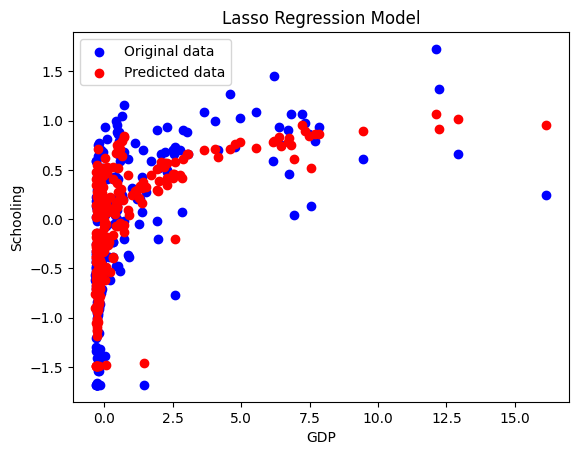

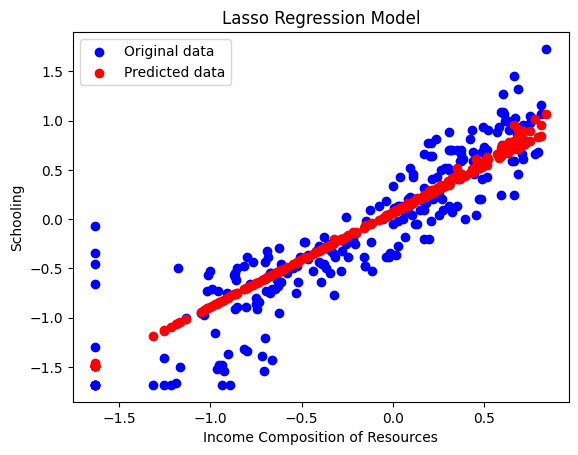

In [65]:
# displaying lasso regression model
import matplotlib.pyplot as plt

plt.scatter(GDP_test, Schooling_test, color='blue', label='Original data')
plt.scatter(GDP_test, y_pred_lasso, color='red', label='Predicted data')
plt.xlabel('GDP')
plt.ylabel('Schooling')
plt.title('Lasso Regression Model')
plt.legend()
plt.show()

plt.scatter(IncomeCompositionOfResources_test, Schooling_test, color='blue', label='Original data')
plt.scatter(IncomeCompositionOfResources_test, y_pred_lasso, color='red', label='Predicted data')
plt.xlabel('Income Composition of Resources')
plt.ylabel('Schooling')
plt.title('Lasso Regression Model')
plt.legend()
plt.show()

In [66]:
# making predictions with lasso regression model
new_GDP = 100000
new_IncomeCompositionOfResources = 0.5
X_new = np.array([[new_GDP, new_IncomeCompositionOfResources]])
predicted_schooling_lasso = grid_search.predict(X_new)
print("Predicted Schooling:", predicted_schooling_lasso)

Predicted Schooling: [1641.71917425]


### Do vaccines affect life expectancy: Linear and Polynomial Regression


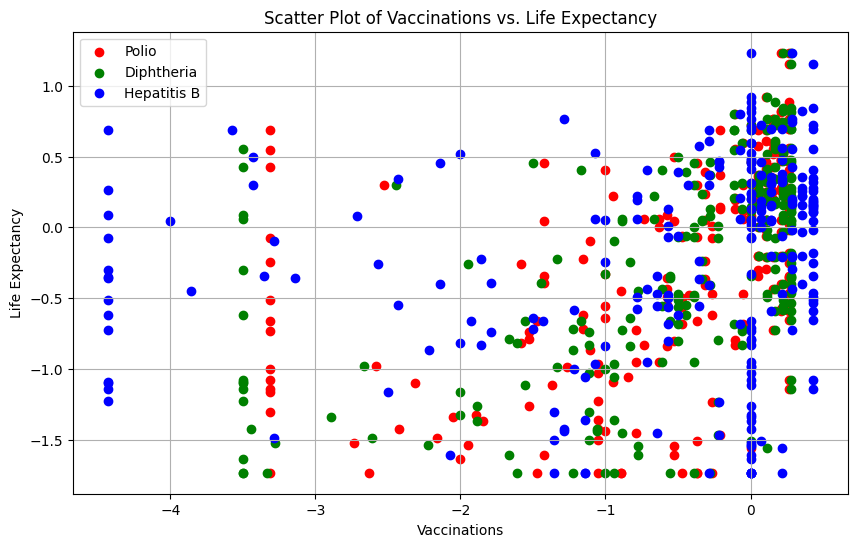

In [67]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(Polio_test, LifeExpectancy_test, label='Polio', color='red')
plt.scatter(Diphtheria_test, LifeExpectancy_test, label='Diphtheria', color='green')
plt.scatter(HepatitisB_test, LifeExpectancy_test, label='Hepatitis B', color='blue')
plt.xlabel('Vaccinations')
plt.ylabel('Life Expectancy')
plt.title('Scatter Plot of Vaccinations vs. Life Expectancy')
plt.legend()
plt.grid(True)
plt.show()


In [68]:
import pandas as pd

data = {
    'Polio': Polio_test,
    'Diphtheria': Diphtheria_test,
    'Hepatitis B': HepatitisB_test,
    'Life Expectancy': LifeExpectancy_test
}
df = pd.DataFrame(data)
correlation_matrix = df.corr()
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                    Polio  Diphtheria  Hepatitis B  Life Expectancy
Polio            1.000000    0.683559     0.366209         0.483780
Diphtheria       0.683559    1.000000     0.404992         0.526883
Hepatitis B      0.366209    0.404992     1.000000         0.181193
Life Expectancy  0.483780    0.526883     0.181193         1.000000


Linear Regression with PCA

In [69]:
#Training vaccines model
import numpy as np
from sklearn.linear_model import LinearRegression

X = Vaccinations_train.reshape(-1, 1)
model = LinearRegression(fit_intercept = True)
model.fit(X, LifeExpectancy_train)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [0.01102547]
Intercept: -0.2080591544693098


In [70]:
#testing vaccines model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

X_test = Vaccinations_test.reshape(-1, 1)
y_pred = model.predict(X_test)
mse = mean_squared_error(LifeExpectancy_test, y_pred)
print("Mean Squared Error (MSE):", mse)
r2 = r2_score(LifeExpectancy_test, y_pred)
print("r2: ", r2)


Mean Squared Error (MSE): 0.5250078922073076
r2:  -0.007183056337426441


In [71]:
predictions = model.predict(Vaccinations_test)
unstandardized_predictions = (predictions * std_life_expectancy) + mean_life_expectancy
unstandardized_predictions

array([67.6165068 , 67.85345114, 67.64158641, 67.484371  , 67.43403153,
       67.58430528, 67.44476537, 67.44977313, 67.71475612, 67.46623305,
       67.80764255, 67.7321971 , 67.4698042 , 67.47624858, 67.70917817,
       67.45811062, 67.68944797, 67.44476537, 67.43403153, 67.48698242,
       67.44215395, 67.84220561, 67.49814638, 67.43903929, 67.45549921,
       67.66466499, 68.10607345, 67.44476537, 67.64570756, 67.43403153,
       67.80159349, 67.47553027, 67.43403153, 67.48748566, 67.43403153,
       67.72637584, 67.52706493, 67.67016158, 67.64635872, 67.43403153,
       67.43403153, 67.70498893, 67.55258064, 67.87814659, 67.46407812,
       67.80971591, 67.64082732, 67.55138545, 67.48770073, 67.56473071,
       67.43403153, 67.43403153, 67.43403153, 67.68352125, 67.69715469,
       67.61868211, 67.46407812, 67.46913264, 67.4734221 , 67.43925436,
       67.58787643, 67.46884446, 67.4824779 , 67.82247636, 67.7705795 ,
       67.49249343, 67.76494862, 67.78912641, 67.46668954, 67.45

<ipython-input-72-076d8247a46a>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([LifeExpectancy_test.min(), LifeExpectancy_test.max()], [LifeExpectancy_test.min(), LifeExpectancy_test.max()], 'k--', lw=4, color='red', label='Ideal Prediction')


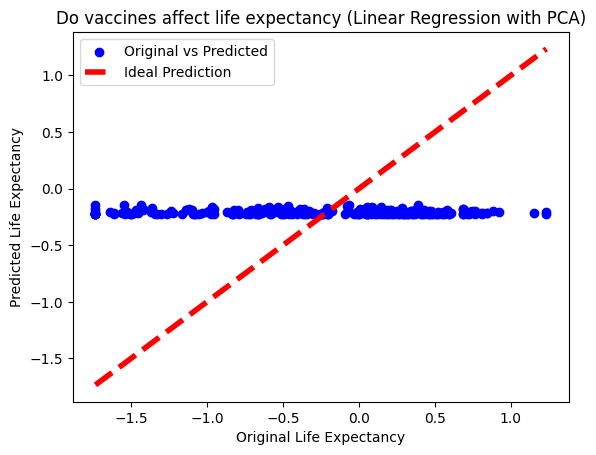

In [72]:
# Plot original vs predicted data
import matplotlib.pyplot as plt


plt.scatter(LifeExpectancy_test, y_pred, color='blue', label='Original vs Predicted')
plt.plot([LifeExpectancy_test.min(), LifeExpectancy_test.max()], [LifeExpectancy_test.min(), LifeExpectancy_test.max()], 'k--', lw=4, color='red', label='Ideal Prediction')
plt.xlabel('Original Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title('Do vaccines affect life expectancy (Linear Regression with PCA)')
plt.legend()
plt.show()


Linear Regression without PCA

In [73]:
#training vaccines model without dimensionality reduction (PCA)
from sklearn.linear_model import LinearRegression
import numpy as np


X_train = np.column_stack((HepatitisB_train, Polio_train, Diphtheria_train))
model = LinearRegression(fit_intercept = True)
model.fit(X_train, LifeExpectancy_train)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [-0.05209533  0.18796711  0.2556088 ]
Intercept: -0.017665112136096867


In [74]:
#testing vaccines model without dimensionality reduction (PCA)
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


X_test = np.column_stack((HepatitisB_test, Polio_test, Diphtheria_test))
y_pred= model.predict(X_test)
mse = mean_squared_error(LifeExpectancy_test, y_pred)
print("Mean squared error:", mse)
r2 = r2_score(LifeExpectancy_test, y_pred)
print("r2: ", r2)

Mean squared error: 0.3613085490484755
r2:  0.306860231792875


In [75]:
import numpy as np
X_test = np.column_stack((HepatitisB_test, Polio_test, Diphtheria_test))
predictions = model.predict(X_test)
unstandardized_predictions = (predictions * std_life_expectancy) + mean_life_expectancy
unstandardized_predictions

array([63.42616372, 68.46411462, 70.20093708, 70.17184762, 70.25289827,
       69.89029357, 58.50570028, 66.32582427, 70.21282647, 65.96776759,
       68.19005911, 55.33951663, 69.32173039, 70.26933569, 69.70077251,
       64.01514073, 67.61604086, 68.2820921 , 70.26933569, 70.47703606,
       70.0852697 , 68.0816609 , 70.26933569, 63.21789174, 65.26709962,
       66.47345943, 63.02984933, 67.20700223, 69.89029357, 70.38500307,
       68.94268827, 71.10013719, 66.86886676, 68.60462501, 70.26933569,
       69.8046227 , 69.89029357, 69.49397918, 70.17184762, 61.52338838,
       70.26933569, 66.83461103, 64.87359135, 67.32721763, 70.25289827,
       68.64469681, 69.73538924, 70.26933569, 70.35674846, 65.59046737,
       69.54586818, 66.19190538, 69.03472127, 70.26933569, 67.61604086,
       71.51553794, 69.82106011, 68.67749943, 66.50073479, 69.76909892,
       70.26933569, 68.18460404, 70.26933569, 56.93233214, 66.46611806,
       69.58192525, 65.62879727, 67.7873826 , 63.27201526, 60.38

<ipython-input-76-97733af23eb7>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([LifeExpectancy_test.min(), LifeExpectancy_test.max()], [LifeExpectancy_test.min(), LifeExpectancy_test.max()], 'k--', lw=4, color='red', label='Ideal Prediction')


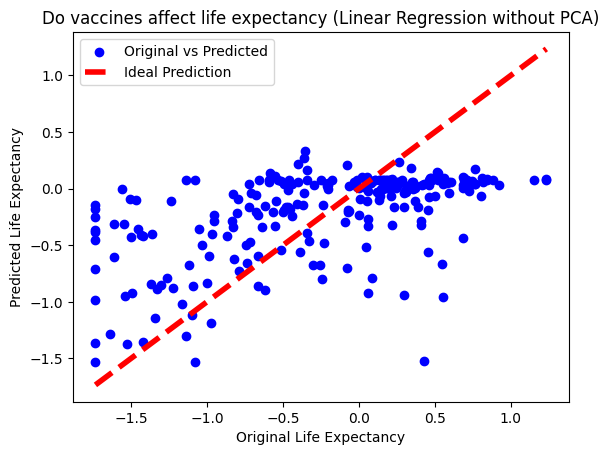

In [76]:
import matplotlib.pyplot as plt

X_test = np.column_stack((HepatitisB_test, Polio_test, Diphtheria_test))
plt.scatter(LifeExpectancy_test, model.predict(X_test), color='blue', label='Original vs Predicted')
plt.plot([LifeExpectancy_test.min(), LifeExpectancy_test.max()], [LifeExpectancy_test.min(), LifeExpectancy_test.max()], 'k--', lw=4, color='red', label='Ideal Prediction')
plt.xlabel('Original Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title('Do vaccines affect life expectancy (Linear Regression without PCA)')
plt.legend()
plt.show()



Polynomial Regression without PCA

In [77]:
#optimization
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

X_val = np.column_stack((HepatitisB_val, Polio_val, Diphtheria_val))
pipeline = Pipeline([
    ('poly', PolynomialFeatures()),
    ('linear', LinearRegression())
])

param_grid = {
    'poly__degree': [1, 2, 3, 4, 5]
}
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_val, LifeExpectancy_val)
print("Best negative mean squared error:", grid_search.best_score_)
print("Best parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_


Best negative mean squared error: -0.3304592059446102
Best parameters: {'poly__degree': 2}


In [78]:
#Polynomial Regression
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X_train = np.column_stack((HepatitisB_train, Polio_train, Diphtheria_train))
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train)
model = LinearRegression(fit_intercept = True)
model.fit(X_poly, LifeExpectancy_train)



LinearRegression()

In [79]:
#Testing polynomial regression model
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


X_test = np.column_stack((HepatitisB_test, Polio_test, Diphtheria_test))
X_poly_test = poly.transform(X_test)
y_test_pred = model.predict(X_poly_test)
test_error = mean_squared_error(LifeExpectancy_test, y_test_pred)
print("Mean Squared Error:", test_error)
r2 = r2_score(LifeExpectancy_test, y_pred)
print("r2: ", r2)


Mean Squared Error: 0.31056879199201126
r2:  0.306860231792875


In [80]:
X_test = np.column_stack((HepatitisB_test, Polio_test, Diphtheria_test))
X_poly_test = poly.transform(X_test)
y_test_pred = model.predict(X_poly_test)
y_test_pred_unstandard = (y_test_pred * std_life_expectancy) + mean_life_expectancy
y_test_pred_unstandard

array([67.0847097 , 67.7695643 , 71.58500878, 71.20031584, 71.83170924,
       70.41285557, 56.42581836, 64.10543529, 71.79954122, 63.09102463,
       66.57920854, 59.74882105, 69.08015251, 71.35307458, 69.95827116,
       61.13351666, 65.64094656, 66.81846688, 71.35307458, 72.50989564,
       70.71795896, 66.70701186, 71.35307458, 60.71223791, 62.23581321,
       63.90223582, 65.85904856, 64.07437385, 70.41285557, 72.19334329,
       68.2434341 , 74.97932732, 64.22802002, 67.93460789, 71.35307458,
       70.51850465, 70.41285557, 69.41527357, 71.20031584, 62.93639127,
       71.35307458, 65.17676444, 59.87205629, 64.21485331, 71.83170924,
       67.9779062 , 70.14965006, 71.35307458, 72.3484479 , 62.93877888,
       69.70107883, 63.45444515, 68.52145722, 71.35307458, 65.64094656,
       75.79142218, 70.00752081, 67.26133942, 63.59761842, 69.75249906,
       71.35307458, 66.69419801, 71.35307458, 58.04022792, 63.45113937,
       68.03990983, 62.65918683, 65.32135939, 68.09379925, 65.09

<ipython-input-81-74a93ec2f1e5>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([min(LifeExpectancy_test), max(LifeExpectancy_test)], [min(y_test_pred), max(y_test_pred)], 'k--', lw=4, color='red', label='Ideal Prediction')


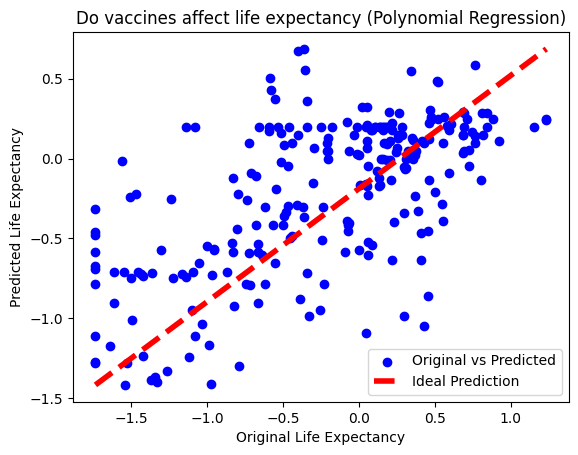

In [81]:
import matplotlib.pyplot as plt

plt.scatter(LifeExpectancy_test, y_test_pred, color='blue', label='Original vs Predicted')
plt.plot([min(LifeExpectancy_test), max(LifeExpectancy_test)], [min(y_test_pred), max(y_test_pred)], 'k--', lw=4, color='red', label='Ideal Prediction')
plt.xlabel('Original Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title('Do vaccines affect life expectancy (Polynomial Regression)')
plt.legend()
plt.show()


Polynomial Regression with PCA

In [82]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

pipeline = Pipeline([
    ('poly', PolynomialFeatures()),
    ('regressor', LinearRegression())
])

param_grid = {
    'poly__degree': [1, 2, 3, 4]
}
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(Vaccinations_val, LifeExpectancy_val)
best_model = grid_search.best_estimator_
print("Best degree of polynomial features:", best_model.named_steps['poly'].degree)


Best degree of polynomial features: 1


In [83]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np

poly = PolynomialFeatures(degree=1)
X_poly_train = poly.fit_transform(Vaccinations_train)
model = LinearRegression(fit_intercept = True)
model.fit(X_poly_train, LifeExpectancy_train)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Coefficients: [0.         0.01102547]
Intercept: -0.2080591544693098


In [84]:
from sklearn.metrics import mean_squared_error, r2_score

predictions = best_model.predict(Vaccinations_test)
mse = mean_squared_error(LifeExpectancy_test, predictions)
print("Mean Squared Error ", mse)
r2 = r2_score(LifeExpectancy_test, predictions)
print("R-squared", r2)


Mean Squared Error  0.5280700467569239
R-squared -0.013057539795747974


In [85]:
X_poly_test = poly.transform(Vaccinations_test)
y_test_pred = model.predict(X_poly_test)
y_test_pred = (y_test_pred * std_life_expectancy) + mean_life_expectancy
y_test_pred

array([67.6165068 , 67.85345114, 67.64158641, 67.484371  , 67.43403153,
       67.58430528, 67.44476537, 67.44977313, 67.71475612, 67.46623305,
       67.80764255, 67.7321971 , 67.4698042 , 67.47624858, 67.70917817,
       67.45811062, 67.68944797, 67.44476537, 67.43403153, 67.48698242,
       67.44215395, 67.84220561, 67.49814638, 67.43903929, 67.45549921,
       67.66466499, 68.10607345, 67.44476537, 67.64570756, 67.43403153,
       67.80159349, 67.47553027, 67.43403153, 67.48748566, 67.43403153,
       67.72637584, 67.52706493, 67.67016158, 67.64635872, 67.43403153,
       67.43403153, 67.70498893, 67.55258064, 67.87814659, 67.46407812,
       67.80971591, 67.64082732, 67.55138545, 67.48770073, 67.56473071,
       67.43403153, 67.43403153, 67.43403153, 67.68352125, 67.69715469,
       67.61868211, 67.46407812, 67.46913264, 67.4734221 , 67.43925436,
       67.58787643, 67.46884446, 67.4824779 , 67.82247636, 67.7705795 ,
       67.49249343, 67.76494862, 67.78912641, 67.46668954, 67.45

### Does Money make people live longer: Elastic Net Regression

In [86]:
#Does money make people live longer
from sklearn.linear_model import ElasticNet
import numpy as np

# train elastic net regression model
elastic_net_model = ElasticNet(alpha=0.1, l1_ratio=0.5)  # Using Elastic Net with alpha=0.1 and l1_ratio=0.5
X_train = np.column_stack((GDP_train, PercentageExpenditure_train))
elastic_net_model.fit(X_train, LifeExpectancy_train)


ElasticNet(alpha=0.1)

In [87]:
print("Coefficients:", elastic_net_model.coef_)
print("Intercept:", elastic_net_model.intercept_)

Coefficients: [0.12263889 0.03221222]
Intercept: -0.33483357667721925


In [88]:
# testing elastic net regression model
from sklearn.metrics import mean_squared_error

X_test = np.column_stack((GDP_test, PercentageExpenditure_test))
y_pred_elastic_net = elastic_net_model.predict(X_test)
mse_elastic_net = mean_squared_error(LifeExpectancy_test, y_pred_elastic_net)
print("Mean squared error:", mse_elastic_net)


Mean squared error: 0.4002744957631073


In [89]:
# testing elastic net regression model using r2 score
from sklearn.metrics import r2_score

r2 = r2_score(LifeExpectancy_test, y_pred_elastic_net)
print("R2 Score:", r2)

R2 Score: 0.2321073720975252


In [90]:
#optimising elastic net model
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
import numpy as np

# create Elastic Net model
elastic_net_model = ElasticNet()

# create a dictionary of hyperparameters to search
search_parameters = {
    'alpha': [0.001, 0.01, 0.05, 0.1, 0.5, 1, 5, 10],
    'l1_ratio': [0.01, 0.05, 0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]
}

# create grid search object
grid_search = GridSearchCV(elastic_net_model, search_parameters, cv=5, scoring='neg_mean_squared_error')

# fit model
X = np.column_stack((GDP_train, PercentageExpenditure_train))
grid_search.fit(X, LifeExpectancy_train)

# get best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


Best hyperparameters: {'alpha': 0.01, 'l1_ratio': 0.01}
Best score: -0.40847680177971374


In [91]:
# retrain elastic net model with best hyperparameters
elastic_net_model = ElasticNet(alpha=0.1, l1_ratio=0.01)
X = np.column_stack((GDP_train, PercentageExpenditure_train))
elastic_net_model.fit(X, LifeExpectancy_train)


ElasticNet(alpha=0.1, l1_ratio=0.01)

In [92]:
#testing elastic net model with best hyperparameters
from sklearn.metrics import mean_squared_error

X_test = np.column_stack((GDP_test, PercentageExpenditure_test))
y_pred_elastic_net = grid_search.predict(X_test)
mse_elastic_net = mean_squared_error(LifeExpectancy_test, y_pred_elastic_net)
print("Mean squared error:", mse_elastic_net)

# testing elastic net regression model using r2 score and best hyperparameters
from sklearn.metrics import r2_score

r2 = r2_score(LifeExpectancy_test, y_pred_elastic_net)
print("R2 Score:", r2)

Mean squared error: 0.3950906593028148
R2 Score: 0.24205212212343374


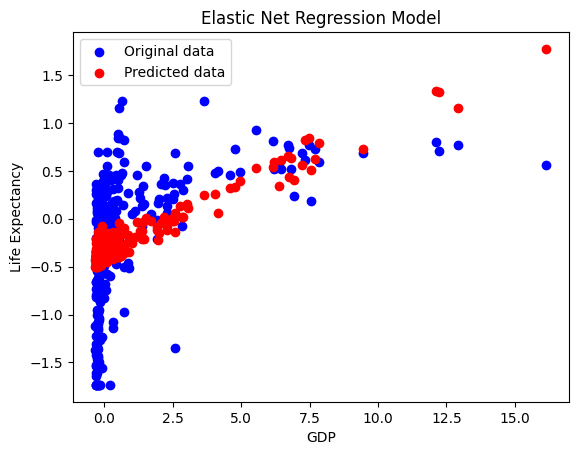

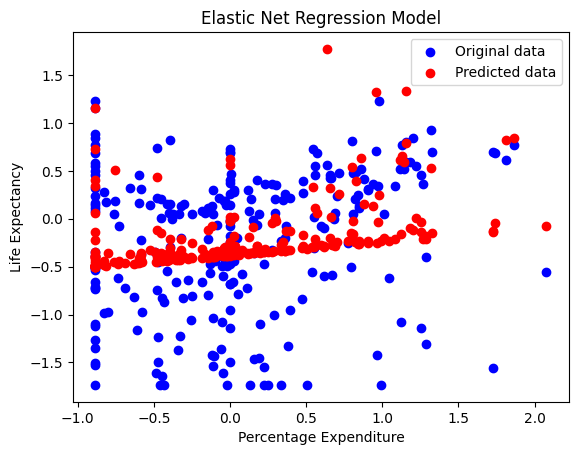

In [93]:
#displaying elastic net regression model
import matplotlib.pyplot as plt

plt.scatter(GDP_test, LifeExpectancy_test, color='blue', label='Original data')
plt.scatter(GDP_test, y_pred_elastic_net, color='red', label='Predicted data')
plt.xlabel('GDP')
plt.ylabel('Life Expectancy')
plt.title('Elastic Net Regression Model')
plt.legend()
plt.show()

plt.scatter(PercentageExpenditure_test, LifeExpectancy_test, color='blue', label='Original data')
plt.scatter(PercentageExpenditure_test, y_pred_elastic_net, color='red', label='Predicted data')
plt.xlabel('Percentage Expenditure')
plt.ylabel('Life Expectancy')
plt.title('Elastic Net Regression Model')
plt.legend()
plt.show()

In [94]:
#making predictions with elastic net regression model
new_GDP = 100000
new_PercentageExpenditure = 5
X_new = np.array([[new_GDP, new_PercentageExpenditure]])
predicted_life_expectancy_elastic_net = grid_search.predict(X_new)
print("Predicted Life Expectancy:", predicted_life_expectancy_elastic_net)

Predicted Life Expectancy: [12585.30806046]


### Does your region affect your life expectancy: Random Forest Regression

In [95]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import numpy as np
X_train = np.concatenate((Continents_train, Development_status_train), axis=1)
y_train = LifeExpectancy_train
regressor = RandomForestRegressor(n_estimators=10, random_state=42)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=42)

In [96]:
# cross validation
cv_scores = cross_val_score(regressor, X_train, y_train, cv=5, scoring='r2')
cv_scores_2 = cross_val_score(regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_scores_positive = -cv_scores_2
mean_mse = np.mean(cv_scores_positive)

print("Cross-Validation MSE:", cv_scores_positive)
print("Mean MSE:", mean_mse)
print("Cross-Validation Scores:", cv_scores)
print("Mean R-squared:", np.mean(cv_scores))

Cross-Validation MSE: [0.1873873  0.1974075  0.21166854 0.19270565 0.18922261]
Mean MSE: 0.19567831836679053
Cross-Validation Scores: [0.66984892 0.58154625 0.58910588 0.65597179 0.64795878]
Mean R-squared: 0.6288863242405575


In [97]:
# optimise
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

X_val = np.concatenate((Continents_val, Development_status_val), axis = 1)
y_val = LifeExpectancy_val

param_grid = {
    'n_estimators': [50, 100],
    'max_features': ['sqrt', 'log2','auto'],
    'max_depth': [None, 8],
    'min_samples_split': [2,3],
    'min_samples_leaf': [1, 2],
}
# Instantiate GridSearchCV
grid_search = GridSearchCV(
    RandomForestRegressor(random_state=42),  # RandomForestRegressor instance
    param_grid=param_grid,  # Hyperparameter grid
    cv=5,  # 5-fold cross-validation
    scoring='r2'  # Scoring metric
)
grid_search.fit(X_val, y_val)

# Print results
print_results(grid_search)

best_params = grid_search.best_params_

model_grid = RandomForestRegressor(**best_params, random_state=23)
model_grid.fit(X_train, y_train)

NameError: name 'print_results' is not defined

In [ ]:
# cross validation
cv_scores = cross_val_score(model_grid, X_train, y_train, cv=4, scoring='r2')
cv_scores_2 = cross_val_score(model_grid, X_train, y_train, cv=4, scoring='neg_mean_squared_error')
cv_scores_positive = -cv_scores_2
mean_mse = np.mean(cv_scores_positive)

print("Cross-Validation MSE:", cv_scores_positive)
print("Mean MSE:", mean_mse)
print("Cross-Validation Scores:", cv_scores)
print("Mean R-squared:", np.mean(cv_scores))

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

X_test =np.concatenate((Continents_test, Development_status_test), axis=1)
y_test = LifeExpectancy_test
y_prediction = model_grid.predict(X_test)

In [ ]:
lifeexpec_test_graphable = pd.DataFrame(y_test)
lifeexpec_pred_graphable= pd.DataFrame(y_prediction)
lifeexpec_pred_graphable.rename(columns = {0:'Lifeexpectancy'}, inplace = True)

Continents_test_graphable =  pd.DataFrame(Continents_test)
test_graph = pd.concat([Continents_test_graphable, lifeexpec_test_graphable], axis = 1)
Continents_test_graphable.reset_index(drop=True, inplace=True)
predict_graph =  pd.concat([Continents_test_graphable, lifeexpec_pred_graphable], axis = 1)

dev_test_graphable = pd.DataFrame(Development_status_test)
dev_le_test_graph = pd.concat([dev_test_graphable, lifeexpec_test_graphable], axis = 1)
Continents_test_graphable.reset_index(drop=True, inplace=True)
dev_le_pred_graph = pd.concat([dev_test_graphable, lifeexpec_pred_graphable], axis = 1)


In [ ]:
continent_means_test = {}
continent_means_pred = {}

for continent in ['Europe', 'Asia', 'North America', 'Oceania', 'South America', 'Africa']:

    continent_df_test = test_graph[test_graph[continent] == 1]
    continent_df_pred = predict_graph[predict_graph[continent] == 1]

    mean_life_expectancy_test = continent_df_test['Lifeexpectancy'].mean()
    mean_life_expectancy_pred = continent_df_pred['Lifeexpectancy'].mean()

    continent_means_test[continent] =(mean_life_expectancy_test * std_life_expectancy) + mean_life_expectancy
    continent_means_pred[continent] = (mean_life_expectancy_pred * std_life_expectancy) + mean_life_expectancy

continent_means_series_test = pd.Series(continent_means_test)
continent_means_series_pred = pd.Series(continent_means_pred)

bar_width = 0.35
range1 = range(len(continent_means_series_test))
range2 = [x + bar_width for x in range1]

# Plot
plt.figure(figsize=(10, 6))
plt.bar(range1, continent_means_series_test, color='limegreen', width=bar_width, edgecolor='grey', label='Test Data')
plt.bar(range2, continent_means_series_pred, color='blue', width=bar_width, edgecolor='grey', label='Prediction Data')
plt.xlabel('Continent', fontweight='bold')
plt.ylabel('Mean Life Expectancy', fontweight='bold')
plt.xticks([r + bar_width / 2 for r in range(len(continent_means_series_test))], continent_means_series_test.index, rotation=45)
plt.title('Mean Life Expectancy by Continent', fontweight='bold')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
dev_means_test = {}
dev_means_pred = {}

for status in ['Developed', 'Developing']:

    dev_df_test = dev_le_test_graph[dev_le_test_graph[status] == 1]
    dev_df_pred = dev_le_pred_graph[dev_le_pred_graph[status] == 1]

    mean_life_expectancy_test = dev_df_test['Lifeexpectancy'].mean()
    mean_life_expectancy_pred = dev_df_pred['Lifeexpectancy'].mean()

    dev_means_test[status] = (mean_life_expectancy_test * std_life_expectancy) + mean_life_expectancy
    dev_means_pred[status] = (mean_life_expectancy_pred * std_life_expectancy) + mean_life_expectancy

print(dev_means_test)
dev_means_test_series = pd.Series(dev_means_test)
dev_means_pred_series = pd.Series(dev_means_pred)

bar_width = 0.35
range1 = range(len(dev_means_test_series))
range2 = [x + bar_width for x in range1]

# Plot
plt.figure(figsize=(10, 6))

plt.bar(range1, dev_means_test_series, color='limegreen', width=bar_width, edgecolor='grey', label='Test Data')
plt.bar(range2, dev_means_pred_series, color='blue', width=bar_width, edgecolor='grey', label='Prediction Data')
plt.xlabel('Development status', fontweight='bold')
plt.ylabel('Mean Life Expectancy', fontweight='bold')
plt.xticks([r + bar_width / 2 for r in range(len(dev_means_test_series))], dev_means_test_series.index, rotation=45)
plt.title('Mean Life Expectancy by Development Status', fontweight='bold')
plt.legend()

plt.tight_layout()
plt.show()